# TFM - Predicción potenciales compradores de un ecommerce

Este trabajo, está principalmente enfocado a la creación de un modelo de predicción de potenciales compradores en un ecommerce real relacionado con el mundo empresarial.

Se trata de realizar una clasificación de visitantes a una web de venta online en función de los datos que se han almacenado de ellos y establecer su nivel potencial de compra.

Para ello se dispone de diferentes repositorios con datos históricos relativos a:
* características básicas del registro/lead: fecha registro, procedencia, marca de comprador, cuando compró.
* características identificativas anonimizadas de los mismos: email, ubicación geográfica, tipo de persona.
* log de sus movimientos/navegación en la web.
* información sobre los productos que ha comprado.

**Información relevante del negocio**

Los datos proceden de un ecommerce con sede en Colombia que se dedica a la venta de productos relacionados con la información de empresas del país: Informes Comerciales y módulos de información detallada sobre Datos Financieros, Prensa, Administradores, Incidencias, etc, Informes Sectoriales, Base de datos a medida, Productos de Marketing (mercadeo), Información de accionistas, Información de proveedores y clientes, etc.

Los usuarios potenciales compradores (personas en su nombre o representando a una empresa u otra entidad), llegan a la web del ecommerce por diferentes canales: directorios propios, webs de terceros, desde buscadores por labores de SEO y de SEM, etc.  

Dichos usuarios tienen acceso a diferentes productos de menor contenido a cambio de registrarse en un formulario del site, en el que cumplimentan datos personales, email, teléfono, profesión, etc. El usuario pasa a ser Registrado, y es lo que en el mundo del ecommerce se denomina “lead”.  

Tras el registro se permite el acceso a información muy básica sobre las empresas buscadas (Ficha de empresa), y se otorga la posibilidad de consumir gratis 5 productos de información a los que llamamos perfiles de empresa.  

La oferta caduca a los 30 días.  

El Perfil de empresa es un producto con contenido básico y su objetivo es mostrar a los potenciales compradores el nivel del contenido de los productos que suministra el ecommerce.  

Resumiendo, la dinámica es la siguiente:
* Un usuario busca una empresa en internet o en la web.
* Al seleccionar una de las listadas en la búsqueda, se presenta una Ficha (Identificación) y se crea un registro en el log. Se muestra los productos disponibles para consumir.  
    * Productos Promocionales (Perfil de Empresa). Para usuarios Registrados, si el Usuario se registra.
    * Resto de Productos son de Pago. Es necesario estar registrado y pagar.
* El usuario consume un producto (registro en el log) o vuelve a buscar otra empresa.  

Si el usuario Registrado está interesado en conocer más a fondo una empresa o un determinado producto de pago, se le ofrece la posibilidad de contratación:  
* PPV: Compra puntual del producto
* Bonos: compra de un conjunto de unidades o una cantidad de productos a cambio de un pago anticipado.
* Suscripción: pagando una cantidad periodica permite el acceso y consumo de productos, limitado por el volumen de compra y por la fecha de caducidad de la suscripción

Cuando se produce una de estas contrataciones el usuario “Registrado”, pasa a ser “Cliente”.

El propietario del ecommerce tiene información del usuario de su plataforma de Google Analytics que utiliza para la captación en internet, uso de cookies, estrategias de SEO y SEM, acuerdos con portales.  

Ahora desea dar un paso más y quiere conocer más sobre los usuarios registrados para determinar la probabilidad de conversión a cliente. Saber cuáles son potenciales compradores a partir de los datos de ese registro en sus sistemas, del hábito de consumo de productos, y del tipo de empresa buscada/consultada.  

El conjunto de datos está muy desbalanceado por ello es muy importante determinar a qué usuarios registrados debe dirigir el ecommerce sus campañas de captación.  

Por otra parte, pero relacionado con el mismo tema, desean saber que perfil tienen sus clientes y que variables son las mas influyentes/relevantes en la predicción de compra para modificar la estrategia de marketing y su posicionamiento en Internet.  


---------------------

## Análisis y limpieza

En el siguiente notebook se realizará un análisis exploratorio de la información, tanto el fichero de usuarios como el de consumos.

### Modelo de Datos - USUARIOS

* **ID_USUARIO**: Id Único de Usuario (Ej: 8107310)
* **TIPOUSUARIO**: Tipo de Usuario: 
    + PJ = Persona Jurídica
    + PF = Persona Física/Persona Natural 
    + PX = Puede ser PJ pero no es seguro
* **FECHA_REGISTRO**: Fecha de Registro del Usuario
* **CANAL_REGISTRO**: Canal de Registro del Usuario (Ej: 3)
* **IND_CLIENTE**: Indicador de Cliente. Variable Target dicotómica, 1 = Compra, es cliente.
* **IND_ALTA**: Indicador de Alta. Antes de ir a la pasarela de pago para comprar se marca este valor. Dicotómica (1 o 0).
* **FECHA_ALTA**: Fecha del Indicador de Alta.
* **FECHA_CLIENTE**: Fecha en la que el Usuario se convierte a Cliente.
* **TIPOEMAIL**: Tipo de email del Usuario.
* **BONDAD_EMAIL**: Bondad/Ponderación del email, resultado de campañas de emailing: 
    + 20= Verde (OK) 
    + 9 = Naranja (Ha dado un error temporal pero seguimos enviando) 
    + 1 = SPAM 
    + 0 = Rojo (Invalido) 
    + -10 = Dominio invalido (invalido) 
    + -20 = No email
* **USU_TELF**: Teléfono del Usuario, anonimizado. 5 últimas cifras ofuscadas. (Ej: 233XXXXX)
* **IPCASOS**: Número de Usuarios que utilizan la misma IP.
* **IP_Country**: País del Usuario a partir de su IP.
* **IP_Region**: Región del Usuario a partir de su IP
* **USU_TIPO**: Tipología de empresa si TIPOUSUARIO = PJ
* **USU_TAMANIO**: Tamaño de la Compañía del Usuario si TIPOUSUARIO = PJ 
    + GR - Grande 
    + MD - Mediana 
    + PQ - Pequeña 
    + MC - Micro 
    + SD - Sin Definir
* **USU_CIIU**: Código de Actividad CIIU si TIPOUSUARIO = PJ. Detalle en https://www.dane.gov.co/files/sen/nomenclatura/ciiu/CIIURev3AC.pdf
* **USU_ESTADO**: Estado/Situación de la Compañía, si TIPOUSUARIO = PJ.
* **USU_DEPARTAMENTO**: Departamento/Provincia de la Sede del Usuario si TIPOUSUARIO = PJ. Ver https://es.wikipedia.org/wiki/Departamentos_de_Colombia

### Librerías

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
# pd.options.display.max_columns

------------------

------------------

### Dataset - Usuarios

Leemos la información

In [2]:
df_user = pd.read_csv('Data/Usuarios.txt', sep = ';', encoding = 'ISO-8859-1')

In [3]:
df_user.head()

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
0,8107310,PF,22/10/2019 0:00:00,3.0,0,0,NaN,NaN,GOOHOTYAHMAIL,0,233XXXXX,1,Colombia,Valle del Cauca,NaN,NaN,NaN,NaN,NaN
1,7784565,PJ,14/5/2019 0:00:00,3.0,0,0,NaN,NaN,GOOHOTYAHMAIL,20,633XXXXX,1,Colombia,Antioquia,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,N7820,ACTIVA,QUINDIO
2,7718778,PJ,9/4/2019 0:00:00,7.0,0,0,NaN,NaN,GOOHOTYAHMAIL,20,533XXXXX,1,Colombia,Bolivar,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,G4774,ACTIVA,ATLANTICO
3,7952765,PX,12/8/2019 0:00:00,3.0,0,0,NaN,NaN,DOCENTE,20,633XXXXX,1,Colombia,Risaralda,NaN,NaN,NaN,NaN,NaN
4,7855424,PJ,21/6/2019 0:00:00,7.0,0,0,NaN,NaN,GOOHOTYAHMAIL,20,533XXXXX,1,Colombia,Atlántico,EMPRESARIO INDIVIDUAL,MC,N8299,CANCELACIÓN,ATLANTICO


Realizamos un informe conpandas profiling para obtener un análisis previo aproximado.

In [4]:
profile = ProfileReport(df_user)
profile.to_file('report_user.html')

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

------------------

------------------

### Tipo de variables

Las primeras transformaciones que se realizarán, serán sobre los formatos de las variables. Se asignará el formato correcto a cada variable en función de la descripción que se tiene de cada variabable.

In [5]:
df_user.dtypes

ID_USUARIO            int64
TIPOUSUARIO          object
FECHA_REGISTRO       object
CANAL_REGISTRO      float64
IND_CLIENTE           int64
IND_ALTA              int64
FECHA_ALTA           object
FECHA_CLIENTE        object
TIPOEMAIL            object
BONDAD_EMAIL          int64
USU_TELF             object
IPCASOS               int64
IP_Country           object
IP_Region            object
USU_TIPO             object
USU_TAMANIO          object
USU_CIIU             object
USU_ESTADO           object
USU_DEPARTAMENTO     object
dtype: object

Tras observar los diferentes tipos de variables se concluye que hay que transformar las siguientes variables:
* **FECHA_REGISTRO**: string ---> date
* **CANAL_REGISTRO**: float ----> int
* **FECHA_ALTA**: string -------> date
* **FECHA_CLIENTE**: string ----> date

**1. Fechas**

In [6]:
# Fecha
df_user['FECHA_REGISTRO'] = pd.to_datetime(df_user['FECHA_REGISTRO'])
df_user['FECHA_ALTA'] = pd.to_datetime(df_user['FECHA_ALTA'])
df_user['FECHA_CLIENTE'] = pd.to_datetime(df_user['FECHA_CLIENTE'])

**2. Canal de registro**

Antes de convertir a int, es necesario convertir los registros nulos a un valor válido. Usaremos el 5.

In [7]:
df_user['CANAL_REGISTRO'].isna().sum()

7536

In [8]:
df_user['CANAL_REGISTRO'].unique()

array([ 3.,  7.,  2.,  9.,  8.,  1.,  4., nan,  6.])

In [9]:
df_user['CANAL_REGISTRO'].value_counts(dropna = False)

3.0    119030
2.0     84651
8.0     47731
7.0     37189
1.0     36625
4.0     16523
6.0     12190
NaN      7536
9.0      6745
Name: CANAL_REGISTRO, dtype: int64

In [10]:
df_user['CANAL_REGISTRO'][df_user['CANAL_REGISTRO'].isna() == True] = 5

Comprobamos

In [11]:
df_user['CANAL_REGISTRO'].isna().sum()

0

In [12]:
df_user['CANAL_REGISTRO'].unique()

array([3., 7., 2., 9., 8., 1., 4., 5., 6.])

In [13]:
df_user['CANAL_REGISTRO'].value_counts()

3.0    119030
2.0     84651
8.0     47731
7.0     37189
1.0     36625
4.0     16523
6.0     12190
5.0      7536
9.0      6745
Name: CANAL_REGISTRO, dtype: int64

Realizamos la conversión de tipo de variable

In [14]:
df_user['CANAL_REGISTRO'] = df_user['CANAL_REGISTRO'].astype('int')

Comprobamos la conversión de los tipos de variables

In [15]:
df_user.dtypes

ID_USUARIO                   int64
TIPOUSUARIO                 object
FECHA_REGISTRO      datetime64[ns]
CANAL_REGISTRO               int32
IND_CLIENTE                  int64
IND_ALTA                     int64
FECHA_ALTA          datetime64[ns]
FECHA_CLIENTE       datetime64[ns]
TIPOEMAIL                   object
BONDAD_EMAIL                 int64
USU_TELF                    object
IPCASOS                      int64
IP_Country                  object
IP_Region                   object
USU_TIPO                    object
USU_TAMANIO                 object
USU_CIIU                    object
USU_ESTADO                  object
USU_DEPARTAMENTO            object
dtype: object

In [16]:
df_user.head()

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
0,8107310,PF,2019-10-22,3,0,0,NaT,NaT,GOOHOTYAHMAIL,0,233XXXXX,1,Colombia,Valle del Cauca,NaN,NaN,NaN,NaN,NaN
1,7784565,PJ,2019-05-14,3,0,0,NaT,NaT,GOOHOTYAHMAIL,20,633XXXXX,1,Colombia,Antioquia,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,N7820,ACTIVA,QUINDIO
2,7718778,PJ,2019-09-04,7,0,0,NaT,NaT,GOOHOTYAHMAIL,20,533XXXXX,1,Colombia,Bolivar,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,G4774,ACTIVA,ATLANTICO
3,7952765,PX,2019-12-08,3,0,0,NaT,NaT,DOCENTE,20,633XXXXX,1,Colombia,Risaralda,NaN,NaN,NaN,NaN,NaN
4,7855424,PJ,2019-06-21,7,0,0,NaT,NaT,GOOHOTYAHMAIL,20,533XXXXX,1,Colombia,Atlántico,EMPRESARIO INDIVIDUAL,MC,N8299,CANCELACIÓN,ATLANTICO


------------------

------------------

### Duplicidad de la información

Este dataset tiene la información a nivel cliente. Cada usuario debe ser un registro único. 

In [17]:
df_user.duplicated().sum()

513

In [18]:
df_user.shape

(368220, 19)

In [19]:
df_user[df_user.duplicated(keep = False) == True].head(10)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
573,7027076,PJ,2018-03-31,8,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30021XXXXX,1,NaN,NaN,EMPRESARIO INDIVIDUAL,MC,G4711,CANCELACIÓN,BOLIVAR
574,7027076,PJ,2018-03-31,8,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30021XXXXX,1,NaN,NaN,EMPRESARIO INDIVIDUAL,MC,G4711,CANCELACIÓN,BOLIVAR
4170,7807890,PF,2019-05-24,1,0,1,2019-03-06,NaT,GOOHOTYAHMAIL,20,30041XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4171,7807890,PF,2019-05-24,1,0,1,2019-03-06,NaT,GOOHOTYAHMAIL,20,30041XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11416,7820591,PF,2019-05-31,2,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30082XXXXX,2,Colombia,Quindío,NaN,NaN,NaN,NaN,NaN
11417,7820591,PF,2019-05-31,2,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30082XXXXX,2,Colombia,Quindío,NaN,NaN,NaN,NaN,NaN
20114,7071151,PF,2018-04-18,6,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30163XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20115,7071151,PF,2018-04-18,6,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30163XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20116,7365786,PF,2018-09-16,2,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30163XXXXX,3,Colombia,NaN,NaN,NaN,NaN,NaN,NaN
20117,7365786,PF,2018-09-16,2,0,0,NaT,NaT,GOOHOTYAHMAIL,20,30163XXXXX,3,Colombia,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos los duplicados

In [20]:
df_user.drop_duplicates(inplace = True, ignore_index = True)

In [21]:
df_user.shape

(367707, 19)

In [22]:
df_user.duplicated().sum()

0

**Realizamos una última comprobación de duplicidad. Que el número total de registros sea el mismo que el total de ID_USUARIO unicos.**

In [23]:
len(df_user['ID_USUARIO'].unique())

367705

In [24]:
df_user.shape[0]

367707

Observamos que existen duplicados por ID_USUARIO.

In [25]:
df_user[df_user.duplicated(['ID_USUARIO'], keep = False) == True]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
55744,7170269,PJ,2018-05-31,8,0,0,NaT,NaT,GOOHOTYAHMAIL,20,31132XXXXX,1,Colombia,NaN,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,E3830,CANCELACIÓN,BOYACA
55745,7170269,PJ,2018-05-31,8,0,0,NaT,NaT,GOOHOTYAHMAIL,20,31132XXXXX,1,Colombia,NaN,ENTIDAD SIN ANIMO DE LUCRO,MC,S9499,CANCELACIÓN,SANTANDER
171266,7025021,PJ,2018-03-28,7,0,0,NaT,NaT,GOOHOTYAHMAIL,20,32048XXXXX,4,Colombia,NaN,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,E3830,CANCELACIÓN,BOYACA
171267,7025021,PJ,2018-03-28,7,0,0,NaT,NaT,GOOHOTYAHMAIL,20,32048XXXXX,4,Colombia,NaN,ENTIDAD SIN ANIMO DE LUCRO,MC,S9499,CANCELACIÓN,SANTANDER


Tras analizar los duplicados, se observa que el único campo por el que se duplican es USU_TIPO, USU_CIIU y USU_DEPARTAMENTO.  

Se decide que el se eliminen los registros tras considerar que ha sido un error en la captación de la información, manteniendose los que se encuentren primero, entendiendo que estos son los que se han registrado en primera instancia.

In [26]:
df_user = df_user[df_user.duplicated(['ID_USUARIO'], keep = False) == False]

In [27]:
df_user.reset_index(inplace = True, drop = True)

------------------

------------------

### Valores *Missings*

**A continuación se realiza un análisis de los valores missing en de cada variable y su respectivo tratamiento**

In [28]:
df_user.isna().sum()

ID_USUARIO               0
TIPOUSUARIO              0
FECHA_REGISTRO           0
CANAL_REGISTRO           0
IND_CLIENTE              0
IND_ALTA                 0
FECHA_ALTA          363992
FECHA_CLIENTE       365090
TIPOEMAIL                0
BONDAD_EMAIL             0
USU_TELF                66
IPCASOS                  0
IP_Country           21764
IP_Region           150903
USU_TIPO            283591
USU_TAMANIO         283589
USU_CIIU            283589
USU_ESTADO          283589
USU_DEPARTAMENTO    277197
dtype: int64

In [29]:
df_user.head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
0,8107310,PF,2019-10-22,3,0,0,NaT,NaT,GOOHOTYAHMAIL,0,233XXXXX,1,Colombia,Valle del Cauca,NaN,NaN,NaN,NaN,NaN
1,7784565,PJ,2019-05-14,3,0,0,NaT,NaT,GOOHOTYAHMAIL,20,633XXXXX,1,Colombia,Antioquia,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,N7820,ACTIVA,QUINDIO
2,7718778,PJ,2019-09-04,7,0,0,NaT,NaT,GOOHOTYAHMAIL,20,533XXXXX,1,Colombia,Bolivar,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,G4774,ACTIVA,ATLANTICO
3,7952765,PX,2019-12-08,3,0,0,NaT,NaT,DOCENTE,20,633XXXXX,1,Colombia,Risaralda,NaN,NaN,NaN,NaN,NaN
4,7855424,PJ,2019-06-21,7,0,0,NaT,NaT,GOOHOTYAHMAIL,20,533XXXXX,1,Colombia,Atlántico,EMPRESARIO INDIVIDUAL,MC,N8299,CANCELACIÓN,ATLANTICO


------------------

**1. FECHA_ALTA**

**Recordamos**: Fecha del Indicador de Alta

**En este caso, por definición se puede saber que este indicador va relacionado con el campo IND_ALTA, por lo que definimos lo siguiente:**
* Si IND_ALTA = 1, FECHA_ALTA no puede ser nulo.
* Si IND_ALTA = 0, FEHCA_ALTA debe ser nulo (NoApl - No Aplica)

**Realizaremos el tratamiento de la información.**

* Los usuarios con fecha de alta sin informar, deberán tener IND_ALTA = 0, y se les pondrá el valor NoApl en FECHA_ALTA.

**NOTA**: En este caso, al tener además el indicador cliente, quiere decir que el cliente se tuvo que dar de alta en algún momento. Por lo que consideramos la fecha de alta como la misma fecha que la de CLIENTE.

In [30]:
df_user[df_user['FECHA_ALTA'].isna()].groupby(['IND_ALTA'])['IND_ALTA'].count()

IND_ALTA
0    363989
1         3
Name: IND_ALTA, dtype: int64

In [31]:
df_user[(df_user['IND_ALTA'] == 1) & (df_user['FECHA_ALTA'].isna())]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
84043,7405179,PF,2018-08-10,1,1,1,NaT,2018-10-16,GOOHOTYAHMAIL,20,1130128XXXXX,4,Colombia,NaN,NaN,NaN,NaN,NaN,NaN
89353,7255779,PF,2018-07-15,2,1,1,NaT,2018-10-16,GOOHOTYAHMAIL,20,1131525XXXXX,1,Colombia,NaN,NaN,NaN,NaN,NaN,NaN
90216,6921450,PF,2018-08-02,6,1,1,NaT,2018-09-02,SINCLASIFICAR,-10,1131674XXXXX,2,Colombia,NaN,NaN,NaN,NaN,NaN,NaN


**Relizamos la tranformación**

In [32]:
df_user.loc[(df_user['IND_ALTA'] == 1) & (df_user['FECHA_ALTA'].isna()), 'FECHA_ALTA'] = df_user['FECHA_CLIENTE']

In [33]:
df_user[df_user['ID_USUARIO'].isin([7405179,7255779,6921450])]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
84043,7405179,PF,2018-08-10,1,1,1,2018-10-16,2018-10-16,GOOHOTYAHMAIL,20,1130128XXXXX,4,Colombia,NaN,NaN,NaN,NaN,NaN,NaN
89353,7255779,PF,2018-07-15,2,1,1,2018-10-16,2018-10-16,GOOHOTYAHMAIL,20,1131525XXXXX,1,Colombia,NaN,NaN,NaN,NaN,NaN,NaN
90216,6921450,PF,2018-08-02,6,1,1,2018-09-02,2018-09-02,SINCLASIFICAR,-10,1131674XXXXX,2,Colombia,NaN,NaN,NaN,NaN,NaN,NaN


* Los usuarios con fecha de alta informada, deberán tener IND_ALTA = 1.  

In [34]:
df_user[~df_user['FECHA_ALTA'].isna()].groupby(['IND_ALTA'])['IND_ALTA'].count()

IND_ALTA
0       4
1    3710
Name: IND_ALTA, dtype: int64

In [35]:
df_user[(df_user['IND_ALTA'] == 0) & (~df_user['FECHA_ALTA'].isna())]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
162053,7483369,PJ,2018-11-25,2,0,0,2021-01-23,NaT,GOOHOTYAHMAIL,20,71XXXXX,3,Colombia,Bogotá D.C.,ENTIDAD SIN ANIMO DE LUCRO,MC,Q8890,ACTIVA,BOGOTA
171884,7251094,PJ,2018-12-07,3,0,0,2021-01-25,NaT,GOOHOTYAHMAIL,20,32051XXXXX,2,Colombia,Bogotá D.C.,EMPRESARIO INDIVIDUAL,MC,G4711,ACTIVA,TOLIMA
230193,7606382,PF,2019-02-21,8,0,0,2021-01-24,NaT,GOOHOTYAHMAIL,20,131241XXXXX,1,Colombia,Bogotá D.C.,NaN,NaN,NaN,NaN,NaN
323122,7586391,PF,2019-11-02,3,0,0,2021-01-26,NaT,CORPORATIVO,20,162XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Relizamos la tranformación**

In [36]:
df_user.loc[(df_user['IND_ALTA'] == 0) & (~df_user['FECHA_ALTA'].isna()), 'IND_ALTA'] = 1

In [37]:
df_user[df_user['ID_USUARIO'].isin([7483369,7251094,7606382,7586391])]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
162053,7483369,PJ,2018-11-25,2,0,1,2021-01-23,NaT,GOOHOTYAHMAIL,20,71XXXXX,3,Colombia,Bogotá D.C.,ENTIDAD SIN ANIMO DE LUCRO,MC,Q8890,ACTIVA,BOGOTA
171884,7251094,PJ,2018-12-07,3,0,1,2021-01-25,NaT,GOOHOTYAHMAIL,20,32051XXXXX,2,Colombia,Bogotá D.C.,EMPRESARIO INDIVIDUAL,MC,G4711,ACTIVA,TOLIMA
230193,7606382,PF,2019-02-21,8,0,1,2021-01-24,NaT,GOOHOTYAHMAIL,20,131241XXXXX,1,Colombia,Bogotá D.C.,NaN,NaN,NaN,NaN,NaN
323122,7586391,PF,2019-11-02,3,0,1,2021-01-26,NaT,CORPORATIVO,20,162XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Los usuarios con fecha de alta sin informar, deberán tener IND_ALTA = 0. Cambiamos los valores nulos por NA 

In [38]:
df_user[df_user['IND_ALTA'] == 0]['FECHA_ALTA'].value_counts(dropna = False)

NaT    363989
Name: FECHA_ALTA, dtype: int64

In [39]:
df_user.loc[df_user['IND_ALTA'] == 0, 'FECHA_ALTA'] = 'NoApl'

In [40]:
df_user[df_user['IND_ALTA'] == 0]['FECHA_ALTA'].value_counts()

NoApl    363989
Name: FECHA_ALTA, dtype: int64

------------------

**2. FECHA_CLIENTE**

**Recordamos**: Fecha en la que el Usuario se convierte a Cliente

**En este caso, por definición se puede saber que este indicador va relacionado con el campo IND_CLIENTE, por lo que definimos lo siguiente:**
* Si IND_CLIENTE = 1, FECHA_CLIENTE no puede ser nulo.
* Si IND_CLIENTE = 0, FECHA_CLIENTE debe ser nulo (NoApl - No Aplica)

**Realizaremos el tratamiento de la información.**

* Los usuarios con fecha de alta sin informar, deberán tener IND_CLIENTE = 0, y se les pondrá el valor NI en FECHA_CLIENTE.

**NOTA**: En este caso, al tener además el indicador alta, quiere decir que el cliente se tuvo que dar de alta antes de ser cliente. Por lo que consideramos la fecha de alta como la misma fecha que la de CLIENTE.

In [41]:
df_user[df_user['FECHA_CLIENTE'].isna()].groupby(['IND_CLIENTE'])['IND_CLIENTE'].count()

IND_CLIENTE
0    365084
1         6
Name: IND_CLIENTE, dtype: int64

In [42]:
df_user[(df_user['IND_CLIENTE'] == 1) & (df_user['FECHA_CLIENTE'].isna())]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
51660,7880345,PF,2019-08-07,1,1,1,2019-08-07 00:00:00,NaT,GOOHOTYAHMAIL,20,31087XXXXX,183,Colombia,Bogotá D.C.,NaN,NaN,NaN,NaN,NaN
51661,8240404,PF,2019-12-23,3,1,1,2020-05-05 00:00:00,NaT,GOOHOTYAHMAIL,20,31087XXXXX,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87644,7533849,PJ,2019-09-01,1,1,1,2019-01-16 00:00:00,NaT,CORPORATIVO,20,1131249XXXXX,183,Colombia,Bogotá D.C.,NaN,NaN,NaN,NaN,BOGOTA
176927,7867996,PF,2019-02-07,1,1,1,2019-02-07 00:00:00,NaT,GOOHOTYAHMAIL,9,32087XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184422,8231610,PF,2019-12-18,1,1,1,2020-01-29 00:00:00,NaT,GOOHOTYAHMAIL,20,32147XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186127,7872518,PJ,2019-04-07,1,1,1,2020-12-21 00:00:00,NaT,CORPORATIVO,20,32158XXXXX,0,NaN,NaN,EMPRESARIO INDIVIDUAL,MC,G4719,ACTIVA,ANTIOQUIA


**Relizamos la tranformación**

In [43]:
df_user.loc[(df_user['IND_CLIENTE'] == 1) & (df_user['FECHA_CLIENTE'].isna()), 'FECHA_CLIENTE'] = df_user['FECHA_ALTA']

In [44]:
df_user[df_user['ID_USUARIO'].isin([7880345,8240404,7533849,7867996,8231610,7872518])]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
51660,7880345,PF,2019-08-07,1,1,1,2019-08-07 00:00:00,2019-08-07 00:00:00,GOOHOTYAHMAIL,20,31087XXXXX,183,Colombia,Bogotá D.C.,NaN,NaN,NaN,NaN,NaN
51661,8240404,PF,2019-12-23,3,1,1,2020-05-05 00:00:00,2020-05-05 00:00:00,GOOHOTYAHMAIL,20,31087XXXXX,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87644,7533849,PJ,2019-09-01,1,1,1,2019-01-16 00:00:00,2019-01-16 00:00:00,CORPORATIVO,20,1131249XXXXX,183,Colombia,Bogotá D.C.,NaN,NaN,NaN,NaN,BOGOTA
176927,7867996,PF,2019-02-07,1,1,1,2019-02-07 00:00:00,2019-02-07 00:00:00,GOOHOTYAHMAIL,9,32087XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184422,8231610,PF,2019-12-18,1,1,1,2020-01-29 00:00:00,2020-01-29 00:00:00,GOOHOTYAHMAIL,20,32147XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186127,7872518,PJ,2019-04-07,1,1,1,2020-12-21 00:00:00,2020-12-21 00:00:00,CORPORATIVO,20,32158XXXXX,0,NaN,NaN,EMPRESARIO INDIVIDUAL,MC,G4719,ACTIVA,ANTIOQUIA


* Los usuarios con fecha de cliente informada, deberán tener IND_CLIENTE = 1.  

In [45]:
df_user[~df_user['FECHA_CLIENTE'].isna()].groupby(['IND_CLIENTE'])['IND_CLIENTE'].count()

IND_CLIENTE
1    2619
Name: IND_CLIENTE, dtype: int64

En este caso no es necesario realizar ninguna transformación

* Los usuarios con fecha de cliente sin informar, deberán tener IND_CLIENTE = 0. Cambiamos los valores nulos por NoApl 

In [46]:
df_user[df_user['IND_CLIENTE'] == 0]['FECHA_CLIENTE'].value_counts(dropna = False)

NaN    365084
Name: FECHA_CLIENTE, dtype: int64

In [47]:
df_user.loc[df_user['IND_CLIENTE'] == 0, 'FECHA_CLIENTE'] = 'NoApl'

In [48]:
df_user[df_user['IND_CLIENTE'] == 0]['FECHA_CLIENTE'].value_counts()

NoApl    365084
Name: FECHA_CLIENTE, dtype: int64

------------------

**3. USU_TELF**

**Recordamos**: Teléfono del Usuario, anonimizado. 5 últimas cifras ofuscadas. (Ej: 233XXXXX)

In [49]:
df_user[df_user['USU_TELF'].isna()].groupby(['IND_CLIENTE','IND_ALTA'])['IND_CLIENTE'].count()

IND_CLIENTE  IND_ALTA
0            0           66
Name: IND_CLIENTE, dtype: int64

**Como podemos comprobar, aquellos usuarios con el teléfono no registrado, no se han dado de alta y menos son clientes. Esto es debido a que como requisito mínimo para darse de alta uno de los datos que se deben ingresar es el teléfono.**

**Por lo que se decide eliminar los registros.**

In [50]:
df_user['USU_TELF'].isna().sum()

66

In [51]:
df_user.shape

(367703, 19)

In [52]:
df_user = df_user[~df_user['USU_TELF'].isna()]

**Comprobación**

In [53]:
df_user.shape

(367637, 19)

In [54]:
df_user.reset_index(inplace = True, drop = True)

------------------

**4. IP_Country - IP_Region**

**Recordamos**:  
* IP_Country: País del Usuario a partir de su IP.
* IP_Region: Región del Usuario a partir de su IP

**Exploración sobre los posibles valores que podemos encontrar**

In [55]:
len(df_user['IP_Country'].unique())

83

In [56]:
len(df_user['IP_Region'].unique())

317

**Vemos la cantidad de registros sin informar**

In [57]:
df_user['IP_Country'].isna().sum()

21764

In [58]:
df_user['IP_Region'].isna().sum()

150903

In [59]:
df_user[df_user['IP_Country'].isna()].head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
11,8193511,PJ,2019-11-29,9,0,0,NoApl,NoApl,CORPORATIVO,20,233XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,VALLE
15,7454114,PF,2018-07-11,1,0,0,NoApl,NoApl,TEMPORAL,-10,1334XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,7459281,PF,2018-09-11,4,0,0,NoApl,NoApl,TEMPORAL,-10,2334XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,7741807,PJ,2019-04-23,4,0,0,NoApl,NoApl,SINCLASIFICAR,0,30000XXXXX,0,NaN,NaN,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,H5224,ACTIVA,VALLE
49,8153333,PX,2019-12-11,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,20,30000XXXXX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Podemos comprobar que todos los que tienen el IP_Country sin informar, tienen además el IP_Region sin informar, por lo que se les pondrá una categoría nueva No Informado (NI)**

In [60]:
len(df_user[df_user['IP_Country'].isna() & df_user['IP_Region'].isna()])

21764

**Realizamos la transformación**

In [61]:
df_user.loc[(df_user['IP_Country'].isna()) & (df_user['IP_Region'].isna()), ['IP_Country','IP_Region']] = 'NI'

**Comprobación**

In [62]:
df_user[df_user['ID_USUARIO'].isin([8193511,7454114,7459281,7741807,8153333])]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
11,8193511,PJ,2019-11-29,9,0,0,NoApl,NoApl,CORPORATIVO,20,233XXXXX,0,NI,NI,NaN,NaN,NaN,NaN,VALLE
15,7454114,PF,2018-07-11,1,0,0,NoApl,NoApl,TEMPORAL,-10,1334XXXXX,0,NI,NI,NaN,NaN,NaN,NaN,NaN
16,7459281,PF,2018-09-11,4,0,0,NoApl,NoApl,TEMPORAL,-10,2334XXXXX,0,NI,NI,NaN,NaN,NaN,NaN,NaN
48,7741807,PJ,2019-04-23,4,0,0,NoApl,NoApl,SINCLASIFICAR,0,30000XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,H5224,ACTIVA,VALLE
49,8153333,PX,2019-12-11,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,20,30000XXXXX,0,NI,NI,NaN,NaN,NaN,NaN,NaN


**Continuamos con el resto de nulos por IP_Region**

In [63]:
df_user['IP_Region'].isna().sum()

129139

**Son demasiados registros para eliminarlos, y se perdería información importante, por lo que se les asigna la categoría: No Informado (NI)**

In [64]:
df_user.loc[df_user['IP_Region'].isna(), 'IP_Region'] = 'NI'

------------------

**5. USU_TIPO**

**Recordamos**: Tipología de empresa si TIPOUSUARIO = PJ

**Comprobemos que aquellas que vienen sin informar son únicamente PF**

In [65]:
df_user[df_user['USU_TIPO'].isna()].groupby(['TIPOUSUARIO'])['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ      6907
PX     11936
Name: TIPOUSUARIO, dtype: int64

**Realizamos la siguiente transformación.**
* PF: se indicará la categoría No Aplica (NoApl), ya que no aplica este campo.
* PJ y PX: se indicará la categoría No Informado (NI), ya que podría venir informado.

In [66]:
df_user.loc[(df_user['USU_TIPO'].isna()) & (df_user['TIPOUSUARIO'] == 'PF'), 'USU_TIPO'] = 'NoApl'

In [67]:
df_user.loc[(df_user['USU_TIPO'].isna()) & (df_user['TIPOUSUARIO'].isin(['PJ','PX'])), 'USU_TIPO'] = 'NI'

**Por último analizamos a continuación aquellos que son PF y viene informado el campo USU_TIPO**

In [68]:
df_user[df_user['TIPOUSUARIO'] == 'PF'].groupby('USU_TIPO')['USU_TIPO'].count()

USU_TIPO
EMPRESARIO INDIVIDUAL                 986
ENTIDAD FINANCIERA O DE SEGUROS        15
ENTIDAD SIN ANIMO DE LUCRO              3
HOLDING                                 4
NoApl                              264684
SOCIEDAD COMERCIAL/INDUSTRIAL           5
Name: USU_TIPO, dtype: int64

**Se cambiará a TIPOUSUARIO como PJ aquellos que no son de tipo NA**

In [69]:
df_user.loc[(df_user['TIPOUSUARIO'] == 'PF') & (~df_user['USU_TIPO'].isin(['NoApl'])), 'TIPOUSUARIO'] = 'PJ'

**Comprobamos**

In [70]:
df_user[df_user['TIPOUSUARIO'] == 'PF'].groupby('USU_TIPO')['USU_TIPO'].count()

USU_TIPO
NoApl    264684
Name: USU_TIPO, dtype: int64

------------------

**6. USU_TAMANIO, USU_CIIU y USU_ESTADO**

**Recordamos**:
* USU_TAMANIO: Tamaño de la Compañía del Usuario si TIPOUSUARIO = PJ
* USU_CIIU: Código de Actividad CIIU si TIPOUSUARIO = PJ
* USU_ESTADO: Estado/Situación de la Compañía, si TIPOUSUARIO = PJ

Comprobamos los nulos de las 3 variables indicadas

In [71]:
df_user[['USU_TAMANIO', 'USU_CIIU', 'USU_ESTADO']].isna().sum()

USU_TAMANIO    283525
USU_CIIU       283525
USU_ESTADO     283525
dtype: int64

Vemos que los registros con valores nulos en las 3 variables son comunes a las 3 variables.

In [72]:
len(df_user[(df_user['USU_TAMANIO'].isna()) | (df_user['USU_CIIU'].isna()) | (df_user['USU_ESTADO'].isna())][['USU_TAMANIO', 'USU_CIIU', 'USU_ESTADO']])

283525

Las 3 variables tienen en común que aplican los datos unicamente para PJ, por lo que se analiza esta casuística para cada variable

In [73]:
df_user[df_user['USU_TAMANIO'].isna()].groupby('TIPOUSUARIO')['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ      6905
PX     11936
Name: TIPOUSUARIO, dtype: int64

In [74]:
df_user[df_user['USU_CIIU'].isna()].groupby('TIPOUSUARIO')['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ      6905
PX     11936
Name: TIPOUSUARIO, dtype: int64

In [75]:
df_user[df_user['USU_ESTADO'].isna()].groupby('TIPOUSUARIO')['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ      6905
PX     11936
Name: TIPOUSUARIO, dtype: int64

**USU_TAMANIO**:   

Realizamos la transformación:
* Para Aquellos con la casuística con TIPOUSUARIO como PF, se computará el valor No aplica (NoApl)
* Para los que tienen valor PJ y PX se computará el valor Sin Definir (SD)

In [76]:
df_user['USU_TAMANIO'].unique()

array([nan, 'PQ', 'MC', 'GR', 'SD', 'MD'], dtype=object)

In [77]:
df_user.loc[(df_user['USU_TAMANIO'].isna()) & (df_user['TIPOUSUARIO'] == 'PF'), 'USU_TAMANIO'] = 'NoApl'

In [78]:
df_user.loc[(df_user['USU_TAMANIO'].isna()) & (df_user['TIPOUSUARIO'].isin(['PJ','PX'])), 'USU_TAMANIO'] = 'SD'

**Comprobación**

In [79]:
df_user['USU_TAMANIO'].unique()

array(['NoApl', 'PQ', 'MC', 'SD', 'GR', 'MD'], dtype=object)

In [80]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')].groupby(['USU_TAMANIO'])['USU_TAMANIO'].count()

USU_TAMANIO
NoApl    264684
Name: USU_TAMANIO, dtype: int64

In [81]:
df_user.groupby(['USU_TAMANIO','TIPOUSUARIO'])['USU_TAMANIO'].count()

USU_TAMANIO  TIPOUSUARIO
GR           PJ               5821
MC           PJ              60458
             PX                165
MD           PJ               5739
NoApl        PF             264684
PQ           PJ              10110
             PX                  3
SD           PJ               8704
             PX              11953
Name: USU_TAMANIO, dtype: int64

**USU_CIIU**:   

Realizamos la transformación:
* Para Aquellos con la casuística con TIPOUSUARIO como PF, se computará el valor No aplica (NoApl)
* Para los que tienen valor PJ y PX se computará el valor Sin Definir (SD)

In [82]:
df_user['USU_CIIU'].unique()

array([nan, 'N7820', 'G4774', 'N8299', 'M7010', 'F4111', 'G4752', 'K6621',
       'I5511', 'C2660', 'P8551', 'I5611', '7499', 'G4649', 'G4741',
       'H5224', 'F4321', 'J6201', 'H4923', 'M7110', 'R9329', 'J6202',
       'H4922', 'G4771', 'G4651', 'G4663', 'N7830', 'G4659', 'Z0010',
       'F4330', 'C1811', 'G4631', 'F4322', 'L6810', 'G4645', 'G4711',
       'J6110', 'G4530', 'I5619', 'M7310', 'G4791', 'G4761', 'H5229',
       'C3312', 'S9602', 'F4290', 'N8121', 'M7020', 'Q8699', 'C2930',
       'N8291', 'E3811', 'M6920', 'G4773', 'R9200', 'C2221', 'E3830',
       'C3250', 'J6190', 'C2712', 'G4731', 'S9609', 'Q8692', 'C1040',
       'N8130', 'F4390', 'M6910', 'F4220', 'M7410', 'C1080', 'N7710',
       'I5613', 'G4759', 'K6613', 'E3900', 'G4799', 'M7220', 'K6512',
       'Q8691', 'G4652', 'M7490', 'G4751', 'G4719', 'H4921', 'M7420',
       'G4755', 'P8552', 'G4669', 'G4632', 'S9529', 'M7320', 'P8530',
       'G4641', 'G4729', 'P8523', 'G4661', 'G4620', 'I5512', 'I5519',
       'C1690', 

In [83]:
df_user.loc[(df_user['USU_CIIU'].isna()) & (df_user['TIPOUSUARIO'] == 'PF'), 'USU_CIIU'] = 'NoApl'

In [84]:
df_user.loc[(df_user['USU_CIIU'].isna()) & (df_user['TIPOUSUARIO'].isin(['PJ','PX'])), 'USU_CIIU'] = 'SD'

**Comprobación**

In [85]:
df_user['USU_CIIU'].unique()

array(['NoApl', 'N7820', 'G4774', 'SD', 'N8299', 'M7010', 'F4111',
       'G4752', 'K6621', 'I5511', 'C2660', 'P8551', 'I5611', '7499',
       'G4649', 'G4741', 'H5224', 'F4321', 'J6201', 'H4923', 'M7110',
       'R9329', 'J6202', 'H4922', 'G4771', 'G4651', 'G4663', 'N7830',
       'G4659', 'Z0010', 'F4330', 'C1811', 'G4631', 'F4322', 'L6810',
       'G4645', 'G4711', 'J6110', 'G4530', 'I5619', 'M7310', 'G4791',
       'G4761', 'H5229', 'C3312', 'S9602', 'F4290', 'N8121', 'M7020',
       'Q8699', 'C2930', 'N8291', 'E3811', 'M6920', 'G4773', 'R9200',
       'C2221', 'E3830', 'C3250', 'J6190', 'C2712', 'G4731', 'S9609',
       'Q8692', 'C1040', 'N8130', 'F4390', 'M6910', 'F4220', 'M7410',
       'C1080', 'N7710', 'I5613', 'G4759', 'K6613', 'E3900', 'G4799',
       'M7220', 'K6512', 'Q8691', 'G4652', 'M7490', 'G4751', 'G4719',
       'H4921', 'M7420', 'G4755', 'P8552', 'G4669', 'G4632', 'S9529',
       'M7320', 'P8530', 'G4641', 'G4729', 'P8523', 'G4661', 'G4620',
       'I5512', 'I5519',

In [86]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')].groupby(['USU_CIIU'])['USU_CIIU'].count()

USU_CIIU
NoApl    264684
Name: USU_CIIU, dtype: int64

**USU_ESTADO**:   

Realizamos la transformación:
* Para Aquellos con la casuística con TIPOUSUARIO como PF, se computará el valor No aplica (NoApl)
* Para los que tienen valor PJ y PX se computará el valor Sin Definir (SD)

In [87]:
df_user['USU_ESTADO'].unique()

array([nan, 'ACTIVA', 'CANCELACIÓN', 'LIQUIDACION',
       'COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)', 'EXTINGUIDA',
       'LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)',
       'INACTIVA TEMPORAL', 'REESTRUCTURACION O CONCORDATO',
       'SALIDA CLINTON (SDNT OFAC)', 'INTERVENIDA',
       'ANULACIÓN LIQUIDACIÓN'], dtype=object)

In [88]:
df_user.loc[(df_user['USU_ESTADO'].isna()) & (df_user['TIPOUSUARIO'] == 'PF'), 'USU_ESTADO'] = 'NoApl'

In [89]:
df_user.loc[(df_user['USU_ESTADO'].isna()) & (df_user['TIPOUSUARIO'].isin(['PJ','PX'])), 'USU_ESTADO'] = 'SD'

**Comprobación**

In [90]:
df_user['USU_ESTADO'].unique()

array(['NoApl', 'ACTIVA', 'SD', 'CANCELACIÓN', 'LIQUIDACION',
       'COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)', 'EXTINGUIDA',
       'LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)',
       'INACTIVA TEMPORAL', 'REESTRUCTURACION O CONCORDATO',
       'SALIDA CLINTON (SDNT OFAC)', 'INTERVENIDA',
       'ANULACIÓN LIQUIDACIÓN'], dtype=object)

In [91]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')].groupby(['USU_ESTADO'])['USU_ESTADO'].count()

USU_ESTADO
NoApl    264684
Name: USU_ESTADO, dtype: int64

------------------

**7. USU_DEPARTAMENTO**

**Recordamos**: Departamento/Provincia de la Sede del Usuario si TIPOUSUARIO = PJ

In [92]:
df_user['USU_DEPARTAMENTO'].isna().sum()

277134

**Comprobamos el TIPOUSUARIO**

In [93]:
df_user[df_user['USU_DEPARTAMENTO'].isna()].groupby('TIPOUSUARIO')['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ       514
PX     11936
Name: TIPOUSUARIO, dtype: int64

In [94]:
df_user[~df_user['USU_DEPARTAMENTO'].isna()].groupby('TIPOUSUARIO')['TIPOUSUARIO'].count()

TIPOUSUARIO
PJ    90318
PX      185
Name: TIPOUSUARIO, dtype: int64

**Realizamos la transformación**:
* Para Aquellos con la casuística con TIPOUSUARIO como PF, se computará el valor No aplica (NoApl)
* Para los que tienen valor PJ y PX se computará el valor Sin Definir (SD)

In [95]:
df_user.loc[(df_user['USU_DEPARTAMENTO'].isna()) & (df_user['TIPOUSUARIO'] == 'PF'), 'USU_DEPARTAMENTO'] = 'NoApl'

In [96]:
df_user.loc[(df_user['USU_DEPARTAMENTO'].isna()) & (df_user['TIPOUSUARIO'].isin(['PJ','PX'])), 'USU_DEPARTAMENTO'] = 'SD'

**Comprobación**

In [97]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')].groupby(['USU_DEPARTAMENTO'])['USU_DEPARTAMENTO'].count()

USU_DEPARTAMENTO
NoApl    264684
Name: USU_DEPARTAMENTO, dtype: int64

In [98]:
df_user[~df_user['USU_DEPARTAMENTO'].isna()].groupby('TIPOUSUARIO')['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ     90832
PX     12121
Name: TIPOUSUARIO, dtype: int64

In [99]:
df_user['USU_DEPARTAMENTO'].unique()

array(['NoApl', 'QUINDIO', 'ATLANTICO', 'SD', 'VALLE', 'SANTANDER',
       'RISARALDA', 'ANTIOQUIA', 'BOGOTA', 'LA GUAJIRA', 'CESAR',
       'CUNDINAMARCA', 'NORTE SANTANDER', 'CAUCA', 'BOYACA', 'CORDOBA',
       'TOLIMA', 'CALDAS', 'BOLIVAR', 'MAGDALENA', 'META', 'HUILA',
       'SUCRE', 'CASANARE', 'NARINO', 'ARAUCA', 'CHOCO', 'CAQUETA',
       'AMAZONAS', 'PUTUMAYO', 'SAN ANDRES', 'VICHADA', 'GUAVIARE',
       'GUAINIA', 'VAUPES'], dtype=object)

------------------

**A continuación se realiza un análisis de la comprobación de los valores missing en de cada variable**

In [100]:
df_user.isna().sum()

ID_USUARIO          0
TIPOUSUARIO         0
FECHA_REGISTRO      0
CANAL_REGISTRO      0
IND_CLIENTE         0
IND_ALTA            0
FECHA_ALTA          0
FECHA_CLIENTE       0
TIPOEMAIL           0
BONDAD_EMAIL        0
USU_TELF            0
IPCASOS             0
IP_Country          0
IP_Region           0
USU_TIPO            0
USU_TAMANIO         0
USU_CIIU            0
USU_ESTADO          0
USU_DEPARTAMENTO    0
dtype: int64

------------------

------------------

### Distribuciones y valores

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**En este apartado se realizará una visualización sencilla de las distribuciones de cada variable e histogramas, y lo más importante se revisará la lógica y los posibles valores a aplicar en cada variable según los registros**

**1. TIPOUSUARIO**

**Recordemos**: TIPOUSUARIO: Tipo de Usuario:
* PJ = Persona Jurídica
* PF = Persona Física/Persona Natural
* PX = Puede ser PJ pero no es seguro

In [102]:
df_user.groupby(['TIPOUSUARIO'])['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    264684
PJ     90832
PX     12121
Name: TIPOUSUARIO, dtype: int64

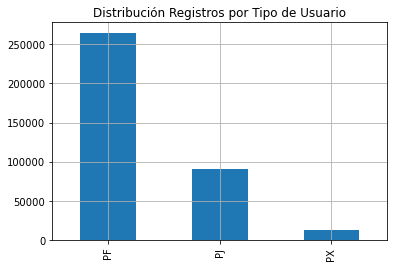

In [103]:
df_user['TIPOUSUARIO'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Usuario')    
plt.grid()
plt.show()

**Aprovechando las transformaciones realizadas en el apartado anterior, se ha podido ver como para ciertos valores de la variable TIPOUSUARIO (PF), no deben aplicar ciertos campos, y sin embargo, para PJ si deben aplicar los campos. En el caso PX, no sabemos, solo se conoce que puede ser PJ pero sin certeza, por lo que realizaremos la siguiente acción sobre el campo TIPOUSUARIO**:
* Para aquellos registros con TIPOUSUARIO = PX, que tengan informados alguno de las variables que solo apliquen a PJ, se les cambiará a PJ.
* En caso contrario se indicará PF

In [104]:
df_user[(df_user['TIPOUSUARIO'] == 'PX')]['USU_TIPO'].unique()

array(['NI', 'EMPRESARIO INDIVIDUAL', 'ENTIDAD FINANCIERA O DE SEGUROS',
       'SOCIEDAD COMERCIAL/INDUSTRIAL', 'HOLDING'], dtype=object)

In [105]:
df_user[(df_user['TIPOUSUARIO'] == 'PX')]['USU_TAMANIO'].unique()

array(['SD', 'MC', 'PQ'], dtype=object)

In [106]:
df_user[(df_user['TIPOUSUARIO'] == 'PX')]['USU_CIIU'].unique()

array(['SD', 'G4799', 'G4711', 'S9511', 'Z9999', 'G4719', 'K6621',
       'R9006', 'M6920', 'G4741', 'H4923', 'I5630', 'F4290', 'R9329',
       'S9609', 'Z0010', 'C1410', 'G4723', 'G4520', 'G4721', 'C1089',
       'M7490', 'J6020', 'M7020', 'C3312', 'M7010', 'S9602', 'I5613',
       'C2599', 'I5611', 'N7911', 'N8130', 'H4921', 'G4773', 'C3110',
       'L6810', 'H5320', 'M7310', 'C2511', 'G4791', 'C1690', 'C2819',
       'G4759', 'N8299', 'J6201', 'G4774', 'G4530', 'I5612', 'K6612',
       'G4761', 'C1040', 'G4755', 'F4321', 'C1072', 'C1081', 'I5619',
       'R9311', 'G4663', 'C2021', 'S9522', 'N7912', 'G4771', '7499',
       'B0510', 'I5514', 'I5511', 'G4752', 'A0130', 'K6511', 'M7110',
       'E3830', 'R9007', 'R9200', 'G4542', 'C2023', 'G4649', 'P8559',
       'R9008', 'C1610', 'C1101'], dtype=object)

In [107]:
df_user[(df_user['TIPOUSUARIO'] == 'PX')]['USU_ESTADO'].unique()

array(['SD', 'ACTIVA', 'CANCELACIÓN', 'LIQUIDACION',
       'SALIDA CLINTON (SDNT OFAC)'], dtype=object)

In [108]:
df_user[(df_user['TIPOUSUARIO'] == 'PX')]['USU_DEPARTAMENTO'].unique()

array(['SD', 'ATLANTICO', 'BOGOTA', 'CESAR', 'TOLIMA', 'MAGDALENA',
       'NORTE SANTANDER', 'ARAUCA', 'CUNDINAMARCA', 'SANTANDER',
       'PUTUMAYO', 'BOYACA', 'HUILA', 'CASANARE', 'VALLE', 'ANTIOQUIA',
       'RISARALDA', 'NARINO', 'CORDOBA', 'CALDAS', 'BOLIVAR', 'CAQUETA',
       'CAUCA', 'META', 'QUINDIO', 'CHOCO'], dtype=object)

**Realizamos la transformación**

In [109]:
df_user.loc[(df_user['TIPOUSUARIO'] == 'PX') &
            ((df_user['USU_TIPO'] != 'NI') | 
             (df_user['USU_TAMANIO'] != 'SD') | 
             (df_user['USU_CIIU'] != 'SD') | 
             (df_user['USU_ESTADO'] != 'SD') | 
             (df_user['USU_DEPARTAMENTO'] != 'SD')), 'TIPOUSUARIO'] = 'PJ'

In [110]:
df_user.loc[(df_user['TIPOUSUARIO'] == 'PX') &
            ((df_user['USU_TIPO'] == 'NI') &
             (df_user['USU_TAMANIO'] == 'SD') & 
             (df_user['USU_CIIU'] == 'SD') & 
             (df_user['USU_ESTADO'] == 'SD') & 
             (df_user['USU_DEPARTAMENTO'] == 'SD')), 'TIPOUSUARIO'] = 'PF'

Comprobación

In [111]:
df_user[(df_user['TIPOUSUARIO'] == 'PX') &
            ((df_user['USU_TIPO'] != 'NI') | 
             (df_user['USU_TAMANIO'] != 'SD') | 
             (df_user['USU_CIIU'] != 'SD') | 
             (df_user['USU_ESTADO'] != 'SD') | 
             (df_user['USU_DEPARTAMENTO'] != 'SD'))]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO


In [112]:
df_user[(df_user['TIPOUSUARIO'] == 'PX') &
            ((df_user['USU_TIPO'] != 'NI') &
             (df_user['USU_TAMANIO'] == 'SD') & 
             (df_user['USU_CIIU'] == 'SD') & 
             (df_user['USU_ESTADO'] == 'SD') & 
             (df_user['USU_DEPARTAMENTO'] == 'SD'))]

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO


In [113]:
df_user.groupby(['TIPOUSUARIO'])['TIPOUSUARIO'].count()

TIPOUSUARIO
PF    276620
PJ     91017
Name: TIPOUSUARIO, dtype: int64

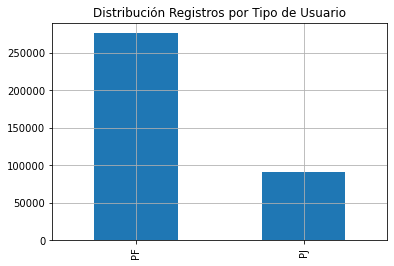

In [114]:
df_user['TIPOUSUARIO'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Usuario')    
plt.grid()
plt.show()

**Realizamos una comrpobación similar para los usuarios PF, de forma que estos no tengan informados los valores**

In [115]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_TIPO'].unique()

array(['NoApl', 'NI'], dtype=object)

In [116]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_TAMANIO'].unique()

array(['NoApl', 'SD'], dtype=object)

In [117]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_CIIU'].unique()

array(['NoApl', 'SD'], dtype=object)

In [118]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_ESTADO'].unique()

array(['NoApl', 'SD'], dtype=object)

In [119]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_DEPARTAMENTO'].unique()

array(['NoApl', 'SD'], dtype=object)

**Realizamos la transformación**:
* Todos los valores de los campos indicados, para los usuarios PF, deben ser NoApl.

In [120]:
df_user.loc[(df_user['TIPOUSUARIO'] == 'PF'), ['USU_TIPO','USU_TAMANIO','USU_CIIU','USU_ESTADO','USU_DEPARTAMENTO']] = 'NoApl'

**Comprobación**

In [121]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_TIPO'].unique()

array(['NoApl'], dtype=object)

In [122]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_TAMANIO'].unique()

array(['NoApl'], dtype=object)

In [123]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_CIIU'].unique()

array(['NoApl'], dtype=object)

In [124]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_ESTADO'].unique()

array(['NoApl'], dtype=object)

In [125]:
df_user[(df_user['TIPOUSUARIO'] == 'PF')]['USU_DEPARTAMENTO'].unique()

array(['NoApl'], dtype=object)

**Realizamos el mismo análisis para PJ**

In [126]:
df_user[(df_user['TIPOUSUARIO'] == 'PJ')]['USU_TIPO'].unique()

array(['SOCIEDAD COMERCIAL/INDUSTRIAL', 'EMPRESARIO INDIVIDUAL',
       'HOLDING', 'ENTIDAD FINANCIERA O DE SEGUROS', 'NI',
       'ENTIDAD SIN ANIMO DE LUCRO', 'ORGANISMO ESTATAL',
       'ENTIDAD EXTRANJERA', 'SOCIEDAD NO COMERCIAL',
       'INDUSTRIA / COMERCIO'], dtype=object)

In [127]:
df_user[(df_user['TIPOUSUARIO'] == 'PJ')]['USU_TAMANIO'].unique()

array(['PQ', 'MC', 'GR', 'SD', 'MD'], dtype=object)

In [128]:
df_user[(df_user['TIPOUSUARIO'] == 'PJ')]['USU_CIIU'].unique()

array(['N7820', 'G4774', 'N8299', 'M7010', 'F4111', 'G4752', 'K6621',
       'I5511', 'SD', 'C2660', 'P8551', 'I5611', '7499', 'G4649', 'G4741',
       'H5224', 'F4321', 'J6201', 'H4923', 'M7110', 'R9329', 'J6202',
       'H4922', 'G4771', 'G4651', 'G4663', 'N7830', 'G4659', 'Z0010',
       'F4330', 'C1811', 'G4631', 'F4322', 'L6810', 'G4645', 'G4711',
       'J6110', 'G4530', 'I5619', 'M7310', 'G4791', 'G4761', 'H5229',
       'C3312', 'S9602', 'F4290', 'N8121', 'M7020', 'Q8699', 'C2930',
       'N8291', 'E3811', 'M6920', 'G4773', 'R9200', 'C2221', 'E3830',
       'C3250', 'J6190', 'C2712', 'G4731', 'S9609', 'Q8692', 'C1040',
       'N8130', 'F4390', 'M6910', 'F4220', 'M7410', 'C1080', 'N7710',
       'I5613', 'G4759', 'K6613', 'E3900', 'G4799', 'M7220', 'K6512',
       'Q8691', 'G4652', 'M7490', 'G4751', 'G4719', 'H4921', 'M7420',
       'G4755', 'P8552', 'G4669', 'G4632', 'S9529', 'M7320', 'P8530',
       'G4641', 'G4729', 'P8523', 'G4661', 'G4620', 'I5512', 'I5519',
       'C1690',

In [129]:
df_user[(df_user['TIPOUSUARIO'] == 'PJ')]['USU_ESTADO'].unique()

array(['ACTIVA', 'CANCELACIÓN', 'SD', 'LIQUIDACION',
       'COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)', 'EXTINGUIDA',
       'LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)',
       'INACTIVA TEMPORAL', 'REESTRUCTURACION O CONCORDATO',
       'SALIDA CLINTON (SDNT OFAC)', 'INTERVENIDA',
       'ANULACIÓN LIQUIDACIÓN'], dtype=object)

In [130]:
df_user[(df_user['TIPOUSUARIO'] == 'PJ')]['USU_DEPARTAMENTO'].unique()

array(['QUINDIO', 'ATLANTICO', 'VALLE', 'SANTANDER', 'RISARALDA',
       'ANTIOQUIA', 'BOGOTA', 'LA GUAJIRA', 'CESAR', 'CUNDINAMARCA',
       'NORTE SANTANDER', 'CAUCA', 'BOYACA', 'CORDOBA', 'TOLIMA',
       'CALDAS', 'BOLIVAR', 'MAGDALENA', 'META', 'HUILA', 'SUCRE',
       'CASANARE', 'SD', 'NARINO', 'ARAUCA', 'CHOCO', 'CAQUETA',
       'AMAZONAS', 'PUTUMAYO', 'SAN ANDRES', 'VICHADA', 'GUAVIARE',
       'GUAINIA', 'VAUPES'], dtype=object)

-----------------------------

**3. FECHA_REGISTRO**

Se comprobará que la Fecha de Registro, sea anterior a la fecha de alta del usuario.

In [131]:
df_comprobacion = df_user[(df_user['IND_ALTA'] == 1)]
df_comprobacion.shape[0]

3714

In [132]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_REGISTRO']) <= pd.to_datetime(df_comprobacion['FECHA_ALTA']))].shape[0]

3505

In [133]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_REGISTRO']) > pd.to_datetime(df_comprobacion['FECHA_ALTA']))].shape[0]

209

In [134]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_REGISTRO']) > pd.to_datetime(df_comprobacion['FECHA_ALTA']))].head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
4169,7807890,PF,2019-05-24,1,0,1,2019-03-06 00:00:00,NoApl,GOOHOTYAHMAIL,20,30041XXXXX,0,NI,NI,NoApl,NoApl,NoApl,NoApl,NoApl
10665,7799423,PJ,2019-05-21,7,1,1,2019-04-06 00:00:00,2019-04-06 00:00:00,CORPORATIVO,20,30078XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,M7310,ACTIVA,VALLE
10827,7956181,PJ,2019-08-13,7,1,1,2019-02-09 00:00:00,2019-02-09 00:00:00,GOOHOTYAHMAIL,20,30079XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,C1089,ACTIVA,ATLANTICO
12171,7636847,PJ,2019-09-03,4,1,1,2019-04-24 00:00:00,2019-04-24 00:00:00,CORPORATIVO,20,30086XXXXX,2,Colombia,Bogotá D.C.,NI,SD,SD,SD,BOGOTA
15767,8084082,PF,2019-11-10,3,0,1,2019-10-21 00:00:00,NoApl,GOOHOTYAHMAIL,20,30136XXXXX,1,Colombia,Valle del Cauca,NoApl,NoApl,NoApl,NoApl,NoApl


**Observación**: Hay un total de 209 usuarios con fecha de alta anterior a fecha de registro, por lo que les computaremos la fecha de alta a la misma fecha de Registro.

Seleccionamos aquellos a los que debemos cambiar

In [135]:
lista_index = (df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_REGISTRO']) > pd.to_datetime(df_comprobacion['FECHA_ALTA']))].index).tolist()

In [136]:
df_user.loc[df_user.index.isin(lista_index), 'FECHA_ALTA'] = df_user['FECHA_REGISTRO']

**Comprobación**

In [137]:
df_user[df_user.index.isin(lista_index)].head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
4169,7807890,PF,2019-05-24,1,0,1,2019-05-24 00:00:00,NoApl,GOOHOTYAHMAIL,20,30041XXXXX,0,NI,NI,NoApl,NoApl,NoApl,NoApl,NoApl
10665,7799423,PJ,2019-05-21,7,1,1,2019-05-21 00:00:00,2019-04-06 00:00:00,CORPORATIVO,20,30078XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,M7310,ACTIVA,VALLE
10827,7956181,PJ,2019-08-13,7,1,1,2019-08-13 00:00:00,2019-02-09 00:00:00,GOOHOTYAHMAIL,20,30079XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,C1089,ACTIVA,ATLANTICO
12171,7636847,PJ,2019-09-03,4,1,1,2019-09-03 00:00:00,2019-04-24 00:00:00,CORPORATIVO,20,30086XXXXX,2,Colombia,Bogotá D.C.,NI,SD,SD,SD,BOGOTA
15767,8084082,PF,2019-11-10,3,0,1,2019-11-10 00:00:00,NoApl,GOOHOTYAHMAIL,20,30136XXXXX,1,Colombia,Valle del Cauca,NoApl,NoApl,NoApl,NoApl,NoApl


In [138]:
df_comprobacion = df_user[(df_user['IND_ALTA'] == 1)]
df_comprobacion.shape[0]

3714

In [139]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_REGISTRO']) <= pd.to_datetime(df_comprobacion['FECHA_ALTA']))].shape[0]

3714

-----------------------------

**3. FECHA_ALTA & FECHA_CLIENTE**

Se realizará la comprobación entre la relación de Fecha de Alta y Fecha Cliente, es decir al menos todos los que son clientes, deben tener informada la fecha de alta. Además se análizará cuantos de los que se dan de alta se hacen cliente a la vez.

**3.1 No Cliente & No Alta**

In [140]:
df_user[(df_user['IND_CLIENTE'] == 0) & (df_user['IND_ALTA'] == 0)].groupby(['FECHA_ALTA','FECHA_CLIENTE'])[['FECHA_ALTA','FECHA_CLIENTE']].count()

,,FECHA_ALTA,FECHA_CLIENTE
FECHA_ALTA,FECHA_CLIENTE,,
NoApl,NoApl,363923,363923


**3.2 No Cliente & Si Alta**

In [141]:
df_user[(df_user['IND_CLIENTE'] == 0) & (df_user['IND_ALTA'] == 1)].groupby(['FECHA_CLIENTE'])[['FECHA_CLIENTE']].count()

,FECHA_CLIENTE
FECHA_CLIENTE,
NoApl,1095


**3.3 Si Cliente & No Alta**

In [142]:
df_user[(df_user['IND_CLIENTE'] == 1) & (df_user['IND_ALTA'] == 0)].groupby(['FECHA_ALTA'])[['FECHA_ALTA']].count()

,FECHA_ALTA
FECHA_ALTA,


**3.4 Si Cliente & Si Alta**

In [143]:
df_user[(df_user['IND_CLIENTE'] == 1) & (df_user['IND_ALTA'] == 1)].groupby(['FECHA_ALTA','FECHA_CLIENTE'])[['FECHA_ALTA']].count()

FECHA_ALTA
FECHA_ALTA FECHA_CLIENTE            
2018-01-02 2018-01-02              3
2018-01-03 2018-01-03              1
           2018-02-03              1
           2018-04-20              1
2018-01-04 2018-01-04              1
...                              ...
2020-12-29 2020-12-30              1
2021-01-15 2021-01-15              3
2021-01-19 2021-01-19              1
2021-01-22 2021-01-22              3
2021-04-01 2021-04-01              1

[1121 rows x 1 columns]

**Una última comprobación es que todas las fechas de altas deben ser menores o igual que la fecha de cliente. Únicamente aquellos casos que se hayan dado de alta y sean clientes**

In [144]:
df_comprobacion = df_user[(df_user['IND_CLIENTE'] == 1) & (df_user['IND_ALTA'] == 1)]
df_comprobacion.shape[0]

2619

In [145]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_ALTA']) <= pd.to_datetime(df_comprobacion['FECHA_CLIENTE']))].shape[0]

2450

In [146]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_ALTA']) > pd.to_datetime(df_comprobacion['FECHA_CLIENTE']))].head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
10665,7799423,PJ,2019-05-21,7,1,1,2019-05-21 00:00:00,2019-04-06 00:00:00,CORPORATIVO,20,30078XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,M7310,ACTIVA,VALLE
10827,7956181,PJ,2019-08-13,7,1,1,2019-08-13 00:00:00,2019-02-09 00:00:00,GOOHOTYAHMAIL,20,30079XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,C1089,ACTIVA,ATLANTICO
12171,7636847,PJ,2019-09-03,4,1,1,2019-09-03 00:00:00,2019-04-24 00:00:00,CORPORATIVO,20,30086XXXXX,2,Colombia,Bogotá D.C.,NI,SD,SD,SD,BOGOTA
16340,7611483,PJ,2019-02-24,8,1,1,2019-02-24 00:00:00,2019-02-04 00:00:00,GOOHOTYAHMAIL,20,30140XXXXX,1,Colombia,Antioquia,EMPRESARIO INDIVIDUAL,MC,G4711,ACTIVA,ANTIOQUIA
18194,7664961,PF,2019-03-13,4,1,1,2019-03-27 00:00:00,2019-01-04 00:00:00,CORPORATIVO,20,30151XXXXX,121,Colombia,Antioquia,NoApl,NoApl,NoApl,NoApl,NoApl


**Observación**: Hay un total de 25 usuarios con fecha de cliente anterior a fecha de alta, por lo que les computaremos la fecha de cliente a la misma fech ade alta.

Seleccionamos aquellos a los que debemos cambiar

In [147]:
lista_index = (df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_ALTA']) > pd.to_datetime(df_comprobacion['FECHA_CLIENTE']))].index).tolist()

In [148]:
df_user.loc[df_user.index.isin(lista_index), 'FECHA_CLIENTE'] = df_user['FECHA_ALTA']

**Comprobación**

In [149]:
df_user[df_user.index.isin(lista_index)].head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO
10665,7799423,PJ,2019-05-21,7,1,1,2019-05-21 00:00:00,2019-05-21 00:00:00,CORPORATIVO,20,30078XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,M7310,ACTIVA,VALLE
10827,7956181,PJ,2019-08-13,7,1,1,2019-08-13 00:00:00,2019-08-13 00:00:00,GOOHOTYAHMAIL,20,30079XXXXX,0,NI,NI,SOCIEDAD COMERCIAL/INDUSTRIAL,MC,C1089,ACTIVA,ATLANTICO
12171,7636847,PJ,2019-09-03,4,1,1,2019-09-03 00:00:00,2019-09-03 00:00:00,CORPORATIVO,20,30086XXXXX,2,Colombia,Bogotá D.C.,NI,SD,SD,SD,BOGOTA
16340,7611483,PJ,2019-02-24,8,1,1,2019-02-24 00:00:00,2019-02-24 00:00:00,GOOHOTYAHMAIL,20,30140XXXXX,1,Colombia,Antioquia,EMPRESARIO INDIVIDUAL,MC,G4711,ACTIVA,ANTIOQUIA
18194,7664961,PF,2019-03-13,4,1,1,2019-03-27 00:00:00,2019-03-27 00:00:00,CORPORATIVO,20,30151XXXXX,121,Colombia,Antioquia,NoApl,NoApl,NoApl,NoApl,NoApl


In [150]:
df_comprobacion = df_user[(df_user['IND_CLIENTE'] == 1) & (df_user['IND_ALTA'] == 1)]
df_comprobacion.shape[0]

2619

In [151]:
df_comprobacion[(pd.to_datetime(df_comprobacion['FECHA_ALTA']) <= pd.to_datetime(df_comprobacion['FECHA_CLIENTE']))].shape[0]

2619

----------------------------------------

**4. TIPOEMAIL**

El objetivo del análisis de esta variable es comprobar los posibles valores que nos podemos encontrar y si se pueden reducir.

In [152]:
df_user['TIPOEMAIL'].unique()

array(['GOOHOTYAHMAIL', 'DOCENTE', 'CORPORATIVO', 'TEMPORAL',
       'SINCLASIFICAR', 'ADMINISTRACION'], dtype=object)

In [153]:
df_user['TIPOEMAIL'].value_counts()

GOOHOTYAHMAIL     289528
CORPORATIVO        33861
SINCLASIFICAR      20503
DOCENTE            16362
TEMPORAL            6943
ADMINISTRACION       440
Name: TIPOEMAIL, dtype: int64

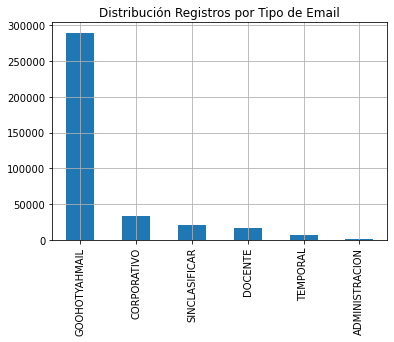

In [154]:
df_user['TIPOEMAIL'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Email')    
plt.grid()
plt.show()

**A priori no se modificará nada sobre esta variable, pero se propondrá lo siguiente para la ingeniería de caracteristicas**:

Nueva Variable: **EMAIL_PERSONAL**
* 1: En caso de GOOHOTYAHMAIL
* 0: En caso contrario

-------------------------------------------

**5. BONDAD_EMAIL**  

**Recordamos**: Bondad/Ponderación del email, resultado de campañas de emailing:
* 20 = Verde (OK)
* 9 = Naranja (Ha dado un error temporal pero seguimos enviando)
* 1 = SPAM
* 0 = Rojo (Invalido)
* -10 = Dominio invalido (invalido)
* -20 = No email

In [155]:
df_user['BONDAD_EMAIL'].unique()

array([  0,  20, -10,   1, -20,   9], dtype=int64)

In [156]:
df_user['BONDAD_EMAIL'].value_counts()

 20    274939
 0      54028
-10     16818
-20     12051
 1       4944
 9       4857
Name: BONDAD_EMAIL, dtype: int64

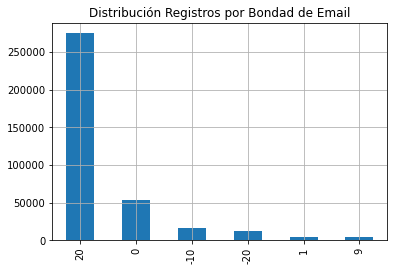

In [157]:
df_user['BONDAD_EMAIL'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Bondad de Email')    
plt.grid()
plt.show()

**Observando los posibles valores podemos reducir estos a 2 valores:**
* 0: No Válido (0, -10, 1, -20)
* 1: Válido (20 y 9)

**Realizamos la transformación**

In [158]:
df_user.loc[(df_user['BONDAD_EMAIL'].isin([0,-10,1,-20])), 'BONDAD_EMAIL'] = 0
df_user.loc[(df_user['BONDAD_EMAIL'].isin([20,9])), 'BONDAD_EMAIL'] = 1

**Comprobación**

In [159]:
df_user['BONDAD_EMAIL'].unique()

array([0, 1], dtype=int64)

In [160]:
df_user['BONDAD_EMAIL'].value_counts()

1    279796
0     87841
Name: BONDAD_EMAIL, dtype: int64

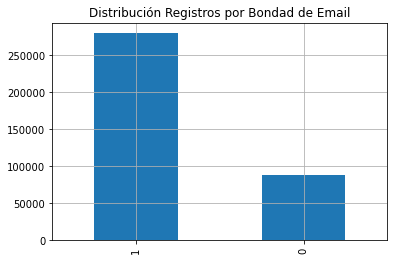

In [161]:
df_user['BONDAD_EMAIL'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Bondad de Email')    
plt.grid()
plt.show()

Realicemos una comprobación con la relacion entre BONDAD_EMAIL y el indicador de cliente y alta.

In [162]:
df_user.groupby(['BONDAD_EMAIL','IND_CLIENTE'])['BONDAD_EMAIL'].count()

BONDAD_EMAIL  IND_CLIENTE
0             0               87695
              1                 146
1             0              277323
              1                2473
Name: BONDAD_EMAIL, dtype: int64

----------------------------------------------------------------------

**6. USU_TIPO**

Analizaremos los posibles valores de la variable USU_TIPO, con el objetivo de realizar agrupaciones

In [163]:
df_user['USU_TIPO'].unique()

array(['NoApl', 'SOCIEDAD COMERCIAL/INDUSTRIAL', 'EMPRESARIO INDIVIDUAL',
       'HOLDING', 'ENTIDAD FINANCIERA O DE SEGUROS', 'NI',
       'ENTIDAD SIN ANIMO DE LUCRO', 'ORGANISMO ESTATAL',
       'ENTIDAD EXTRANJERA', 'SOCIEDAD NO COMERCIAL',
       'INDUSTRIA / COMERCIO'], dtype=object)

In [164]:
df_user['USU_TIPO'].value_counts()

NoApl                              276620
EMPRESARIO INDIVIDUAL               39912
SOCIEDAD COMERCIAL/INDUSTRIAL       37836
NI                                   6907
ENTIDAD FINANCIERA O DE SEGUROS      2509
ENTIDAD SIN ANIMO DE LUCRO           2479
ORGANISMO ESTATAL                     691
HOLDING                               393
ENTIDAD EXTRANJERA                    275
SOCIEDAD NO COMERCIAL                  13
INDUSTRIA / COMERCIO                    2
Name: USU_TIPO, dtype: int64

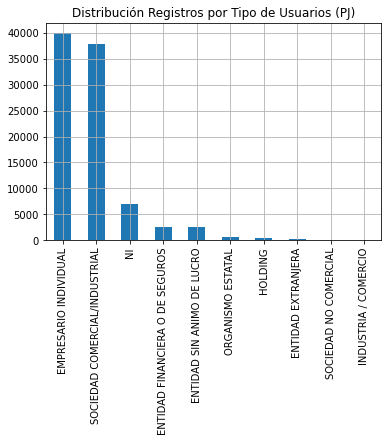

In [165]:
df_user['USU_TIPO'].value_counts()[1:].plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Usuarios (PJ)')    
plt.grid()
plt.show()

**Realizamos las transformaciones**

Agruparemos por conceptos similares.

In [166]:
# Agrupamos: INDUSTRIA / COMERCIO y SOCIEDAD COMERCIAL/INDUSTRIAL
df_user.loc[(df_user['USU_TIPO'].isin(['INDUSTRIA / COMERCIO', 'SOCIEDAD COMERCIAL/INDUSTRIAL'])), 'USU_TIPO'] = 'SOC_COMERCIAL_INDUSTRIAL'

In [167]:
# Agrupamos: ENTIDAD SIN ANIMO DE LUCRO, ORGANISMO ESTATAL y SOCIEDAD NO COMERCIAL
df_user.loc[(df_user['USU_TIPO'].isin(['ENTIDAD SIN ANIMO DE LUCRO', 'ORGANISMO ESTATAL', 'SOCIEDAD NO COMERCIAL'])), 'USU_TIPO'] = 'SOC_NO_COMERCIAL'

In [168]:
# Agrupamos: ENTIDAD EXTRANJERA, HOLDING y SOCIEDAD NO COMERCIAL y ENTIDAD FINANCIERA O DE SEGUROS
df_user.loc[(df_user['USU_TIPO'].isin(['HOLDING', 'ENTIDAD EXTRANJERA', 'ENTIDAD FINANCIERA O DE SEGUROS'])), 'USU_TIPO'] = 'ENTIDAD_HOLDING'

**Comprobación**

In [169]:
df_user['USU_TIPO'].unique()

array(['NoApl', 'SOC_COMERCIAL_INDUSTRIAL', 'EMPRESARIO INDIVIDUAL',
       'ENTIDAD_HOLDING', 'NI', 'SOC_NO_COMERCIAL'], dtype=object)

In [170]:
df_user['USU_TIPO'].value_counts()

NoApl                       276620
EMPRESARIO INDIVIDUAL        39912
SOC_COMERCIAL_INDUSTRIAL     37838
NI                            6907
SOC_NO_COMERCIAL              3183
ENTIDAD_HOLDING               3177
Name: USU_TIPO, dtype: int64

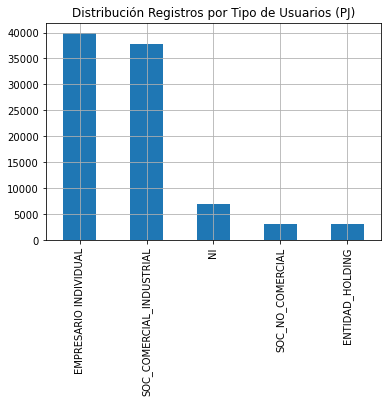

In [171]:
df_user['USU_TIPO'].value_counts()[1:].plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Usuarios (PJ)')    
plt.grid()
plt.show()

-------------------------------------------------

**7. USU_ESTADO**

Analizaremos los posibles valores de la variable USU_ESTADO, con el objetivo de realizar agrupaciones

In [172]:
df_user['USU_ESTADO'].unique()

array(['NoApl', 'ACTIVA', 'CANCELACIÓN', 'SD', 'LIQUIDACION',
       'COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)', 'EXTINGUIDA',
       'LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)',
       'INACTIVA TEMPORAL', 'REESTRUCTURACION O CONCORDATO',
       'SALIDA CLINTON (SDNT OFAC)', 'INTERVENIDA',
       'ANULACIÓN LIQUIDACIÓN'], dtype=object)

In [173]:
df_user['USU_ESTADO'].value_counts()

NoApl                                               276620
ACTIVA                                               67578
CANCELACIÓN                                          13074
SD                                                    6905
LIQUIDACION                                           2362
LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)        500
EXTINGUIDA                                             275
INACTIVA TEMPORAL                                      261
REESTRUCTURACION O CONCORDATO                           32
INTERVENIDA                                              9
COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)         9
SALIDA CLINTON (SDNT OFAC)                               7
ANULACIÓN LIQUIDACIÓN                                    5
Name: USU_ESTADO, dtype: int64

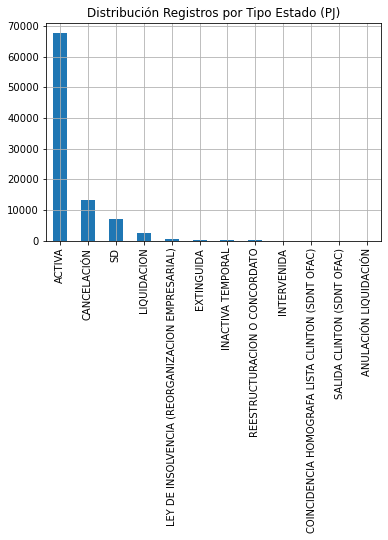

In [174]:
df_user['USU_ESTADO'].value_counts()[1:].plot(kind = 'bar')
plt.title('Distribución Registros por Tipo Estado (PJ)')    
plt.grid()
plt.show()

**Realizamos las transformaciones**

Agruparemos por conceptos similares.

In [175]:
# Agrupamos: CANCELACIÓN, LIQUIDACION, EXTINGUIDA y INACTIVA TEMPORAL
df_user.loc[(df_user['USU_ESTADO'].isin(['CANCELACIÓN', 'LIQUIDACION', 'EXTINGUIDA', 'INACTIVA TEMPORAL'])), 'USU_ESTADO'] = 'INACTIVA'

In [176]:
# Agrupamos: ANULACIÓN LIQUIDACIÓN y ACTIVA
df_user.loc[(df_user['USU_ESTADO'].isin(['ANULACIÓN LIQUIDACIÓN'])), 'USU_ESTADO'] = 'ACTIVA'

In [177]:
# Agrupamos: REESTRUCTURACION O CONCORDATO, INTERVENIDA y LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)
df_user.loc[(df_user['USU_ESTADO'].isin(['REESTRUCTURACION O CONCORDATO','LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)','INTERVENIDA'])), 'USU_ESTADO'] = 'REESTRUCTURACION'

In [178]:
# Agrupamos: COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC) y SALIDA CLINTON (SDNT OFAC)
df_user.loc[(df_user['USU_ESTADO'].isin(['COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)','SALIDA CLINTON (SDNT OFAC)'])), 'USU_ESTADO'] = 'RELACION_CLINTON'

**Comprobación**

In [179]:
df_user['USU_ESTADO'].unique()

array(['NoApl', 'ACTIVA', 'INACTIVA', 'SD', 'RELACION_CLINTON',
       'REESTRUCTURACION'], dtype=object)

In [180]:
df_user['USU_ESTADO'].value_counts()

NoApl               276620
ACTIVA               67583
INACTIVA             15972
SD                    6905
REESTRUCTURACION       541
RELACION_CLINTON        16
Name: USU_ESTADO, dtype: int64

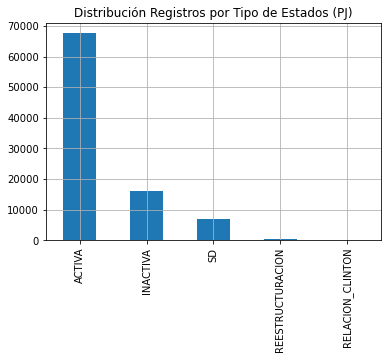

In [181]:
df_user['USU_ESTADO'].value_counts()[1:].plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Estados (PJ)')    
plt.grid()
plt.show()

-------------------------------------------------

**8. IP_Region**

A continuación se revisarán los valores de la variable IP_Región

In [182]:
df_user['IP_Region'].unique()

array(['Valle del Cauca', 'Antioquia', 'Bolivar', 'Risaralda',
       'Atlántico', 'Bogotá D.C.', 'NI', 'Santander', 'New York',
       'Narino', 'Cesar', 'Cundinamarca', 'Casanare', 'Magdalena',
       'Lima region', 'England', 'Florida', 'Norte de Santander', 'Meta',
       'Cordoba', 'Tolima', 'Caldas', 'Provincia de Pichincha',
       'New Jersey', 'Tokyo', 'Huila', 'Sucre', 'Boyaca',
       'Buenos Aires F.D.', 'Provincia de Panama', 'La Guajira',
       'Ã\x8ele-de-France', 'Quindío', 'Jujuy', 'Cauca', 'Arauca',
       'Tennessee', 'Provincia de Manabi', 'Quebec', 'Colorado',
       'Virginia', 'Sao Paulo', 'Michigan', 'Andalusia',
       'Balearic Islands', 'Madrid', 'Koper', 'Putumayo', 'Texas',
       'Guainia', 'Hesse', 'Provincia del Guayas', 'QuerÃ©taro',
       'District of Columbia', 'North Holland', 'Queensland',
       'San Luis PotosÃ\xad', 'Provincie Gelderland', 'Mexico City',
       'Provincia de San Jose', 'Lombardy', 'Uusimaa', 'Georgia',
       'Louisiana', 'Onta

**Realizamos las transformaciones**

Identificamos valores con caracteres extraños

In [183]:
df_user[df_user['IP_Region'].str.contains('Ä|Ã|©|¡|,|È')]['IP_Region'].unique()

array(['Ã\x8ele-de-France', 'QuerÃ©taro', 'San Luis PotosÃ\xad',
       'BolÃ\xadvar', 'TÃ¡chira', "Provence-Alpes-CÃ´te d'Azur",
       'Nuevo LeÃ³n', 'MÃ©rida', 'Baden-WÃ¼rttemberg',
       'Ar RiyÄ\x81á¸\x91', 'SamanÃ¡', 'Castille and LeÃ³n', 'MÃ©xico',
       'Los RÃ\xados Region', 'Ã\x91uble', 'AnzoÃ¡tegui', 'SantarÃ©m',
       'FalcÃ³n', 'TarapacÃ¡', 'ChiÈ\x99inÄ\x83u Municipality'],
      dtype=object)

Modificamos manualmente cada valor encontrado

In [184]:
df_user.loc[(df_user['IP_Region'] == 'Ã\x8ele-de-France'), 'IP_Region'] = 'Hauts-de-France'
df_user.loc[(df_user['IP_Region'] == 'QuerÃ©taro'), 'IP_Region'] = 'Queretaro'
df_user.loc[(df_user['IP_Region'] == 'San Luis PotosÃ\xad'), 'IP_Region'] = 'San Luis'
df_user.loc[(df_user['IP_Region'] == 'TÃ¡chira'), 'IP_Region'] = 'Tachira'
df_user.loc[(df_user['IP_Region'] == 'BolÃ\xadvar'), 'IP_Region'] = 'Bolivar'
df_user.loc[(df_user['IP_Region'] == "Provence-Alpes-CÃ´te d'Azur"), 'IP_Region'] = 'Provenza-Alpes-Costa Azul'
df_user.loc[(df_user['IP_Region'] == 'Nuevo LeÃ³n'), 'IP_Region'] = 'Nuevo León'
df_user.loc[(df_user['IP_Region'] == 'MÃ©rida'), 'IP_Region'] = 'Merida'
df_user.loc[(df_user['IP_Region'] == 'Baden-WÃ¼rttemberg'), 'IP_Region'] = 'Baden-Wurtemberg'
df_user.loc[(df_user['IP_Region'] == 'Ar RiyÄ\x81á¸\x91'), 'IP_Region'] = 'Ar Riyadh'
df_user.loc[(df_user['IP_Region'] == 'SamanÃ¡'), 'IP_Region'] = 'Samana'
df_user.loc[(df_user['IP_Region'] == 'Castille and LeÃ³n'), 'IP_Region'] = 'Castilla y Leon'
df_user.loc[(df_user['IP_Region'] == 'MÃ©xico'), 'IP_Region'] = 'Mexico City'
df_user.loc[(df_user['IP_Region'] == 'Los RÃ\xados Region'), 'IP_Region'] = 'Los Rios'
df_user.loc[(df_user['IP_Region'] == 'Ã\x91uble'), 'IP_Region'] = 'Ñuble'
df_user.loc[(df_user['IP_Region'] == 'AnzoÃ¡tegui'), 'IP_Region'] = 'Anzoategui'
df_user.loc[(df_user['IP_Region'] == 'SantarÃ©m'), 'IP_Region'] = 'Santarem'
df_user.loc[(df_user['IP_Region'] == 'FalcÃ³n'), 'IP_Region'] = 'Falcon'
df_user.loc[(df_user['IP_Region'] == 'TarapacÃ¡'), 'IP_Region'] = 'Tarapaca'
df_user.loc[(df_user['IP_Region'] == 'ChiÈ\x99inÄ\x83u Municipality'), 'IP_Region'] = 'Chisinau'

**Comprobación**

In [185]:
df_user[df_user['IP_Region'].str.contains('Ä|Ã|©|¡|,|È')]['IP_Region'].unique()

array([], dtype=object)

In [186]:
df_user['IP_Region'].unique()

array(['Valle del Cauca', 'Antioquia', 'Bolivar', 'Risaralda',
       'Atlántico', 'Bogotá D.C.', 'NI', 'Santander', 'New York',
       'Narino', 'Cesar', 'Cundinamarca', 'Casanare', 'Magdalena',
       'Lima region', 'England', 'Florida', 'Norte de Santander', 'Meta',
       'Cordoba', 'Tolima', 'Caldas', 'Provincia de Pichincha',
       'New Jersey', 'Tokyo', 'Huila', 'Sucre', 'Boyaca',
       'Buenos Aires F.D.', 'Provincia de Panama', 'La Guajira',
       'Hauts-de-France', 'Quindío', 'Jujuy', 'Cauca', 'Arauca',
       'Tennessee', 'Provincia de Manabi', 'Quebec', 'Colorado',
       'Virginia', 'Sao Paulo', 'Michigan', 'Andalusia',
       'Balearic Islands', 'Madrid', 'Koper', 'Putumayo', 'Texas',
       'Guainia', 'Hesse', 'Provincia del Guayas', 'Queretaro',
       'District of Columbia', 'North Holland', 'Queensland', 'San Luis',
       'Provincie Gelderland', 'Mexico City', 'Provincia de San Jose',
       'Lombardy', 'Uusimaa', 'Georgia', 'Louisiana', 'Ontario', 'Nevada',
     

-------------------------------------------------

**9. IP_Country**

A continuación se revisarán los valores de la variable IP_Country

In [187]:
df_user['IP_Country'].unique()

array(['Colombia', 'NI', 'United States', 'Switzerland', 'Peru',
       'United Kingdom', 'Venezuela', 'Chile', 'Ecuador', 'Japan',
       'Argentina', 'Panama', 'France', 'Cameroon', 'Spain', 'Canada',
       'Brazil', 'Slovenia', 'Germany', 'Mexico', 'Austria',
       'Netherlands', 'Uruguay', 'Australia', 'Costa Rica', 'Sweden',
       'Italy', 'Finland', 'China', 'Russia', 'Bolivia', 'Guatemala',
       'Paraguay', 'Poland', 'Malta', 'United Arab Emirates', 'Singapore',
       'Puerto Rico', 'India', 'Belgium', 'Aruba', 'Hong Kong', 'Andorra',
       'Dominican Republic', 'Norway', 'Israel', 'Belize', 'Jersey',
       'Alemania', 'Czechia', 'Nicaragua', 'CuraÃ§ao', 'Reino Unido',
       'Bonaire, Sint Eustatius, and Saba', 'Taiwan', 'Turkey',
       'South Korea', 'Vietnam', 'Cuba', 'Saudi Arabia', 'Kuwait',
       'Qatar', 'French Guiana', 'Equatorial Guinea', 'New Zealand',
       'Denmark', 'Romania', 'Honduras', 'Portugal', 'Angola', 'Ukraine',
       'Nigeria', 'Croatia', 'Tha

**Únicamente modificaremos el valor de aquel que tiene un valor extraño**

In [188]:
df_user.loc[(df_user['IP_Country'] == 'CuraÃ§ao'), 'IP_Country'] = 'Curacao'

**Existen valores que son iguales pero en diferente idioma. Se unifican**

In [189]:
df_user.loc[(df_user['IP_Country'] == 'United Kingdom'), 'IP_Country'] = 'Reino Unido'
df_user.loc[(df_user['IP_Country'] == 'México'), 'IP_Country'] = 'Mexico'
df_user.loc[(df_user['IP_Country'] == 'Poland'), 'IP_Country'] = 'Polonia'
df_user.loc[(df_user['IP_Country'] == 'Germany'), 'IP_Country'] = 'Alemania'
df_user.loc[(df_user['IP_Country'] == 'Republic of Moldova'), 'IP_Country'] = 'Moldavia'
df_user.loc[(df_user['IP_Country'] == 'Croatia'), 'IP_Country'] = 'Croacia'
df_user.loc[(df_user['IP_Country'] == 'Spain'), 'IP_Country'] = 'España'
df_user.loc[(df_user['IP_Country'] == 'Norway'), 'IP_Country'] = 'Noruega'
df_user.loc[(df_user['IP_Country'] == 'Dominican Republic'), 'IP_Country'] = 'Republica Dominicana'
df_user.loc[(df_user['IP_Country'] == 'Thailand'), 'IP_Country'] = 'Tailandia'
df_user.loc[(df_user['IP_Country'] == 'Belgium'), 'IP_Country'] = 'Belgica'
df_user.loc[(df_user['IP_Country'] == 'Bahrain'), 'IP_Country'] = 'Bahrein'
df_user.loc[(df_user['IP_Country'] == 'Turkey'), 'IP_Country'] = 'Turquia'
df_user.loc[(df_user['IP_Country'] == 'Belize'), 'IP_Country'] = 'Belice'
df_user.loc[(df_user['IP_Country'] == 'New Zealand'), 'IP_Country'] = 'Nueva Zelanda'
df_user.loc[(df_user['IP_Country'] == 'Russia'), 'IP_Country'] = 'Rusia'
df_user.loc[(df_user['IP_Country'] == 'Japan'), 'IP_Country'] = 'Japon'
df_user.loc[(df_user['IP_Country'] == 'Italy'), 'IP_Country'] = 'Italia'
df_user.loc[(df_user['IP_Country'] == 'Brazil'), 'IP_Country'] = 'Brasil'
df_user.loc[(df_user['IP_Country'] == 'Denmark'), 'IP_Country'] = 'Dinamarca'
df_user.loc[(df_user['IP_Country'] == 'Singapore'), 'IP_Country'] = 'Singapur'
df_user.loc[(df_user['IP_Country'] == 'Romania'), 'IP_Country'] = 'Rumania'
df_user.loc[(df_user['IP_Country'] == 'Czechia'), 'IP_Country'] = 'Republica Checa'
df_user.loc[(df_user['IP_Country'] == 'Ukraine'), 'IP_Country'] = 'Ucrania'
df_user.loc[(df_user['IP_Country'] == 'Luxembourg'), 'IP_Country'] = 'Luxemburgo'
df_user.loc[(df_user['IP_Country'] == 'Finland'), 'IP_Country'] = 'Finlandia'
df_user.loc[(df_user['IP_Country'] == 'Netherlands'), 'IP_Country'] = 'Paises Bajos'
df_user.loc[(df_user['IP_Country'] == 'Cameroon'), 'IP_Country'] = 'Camerun'
df_user.loc[(df_user['IP_Country'] == 'Sweden'), 'IP_Country'] = 'Suecia'
df_user.loc[(df_user['IP_Country'] == 'Saudi Arabia'), 'IP_Country'] = 'Arabia Saudita'
df_user.loc[(df_user['IP_Country'] == 'United Arab Emirates'), 'IP_Country'] = 'Emiratos Arabes Unidos'
df_user.loc[(df_user['IP_Country'] == 'France'), 'IP_Country'] = 'Francia'
df_user.loc[(df_user['IP_Country'] == 'Guadeloupe'), 'IP_Country'] = 'Guadalupe'
df_user.loc[(df_user['IP_Country'] == 'Equatorial Guinea'), 'IP_Country'] = 'Guinea Ecuatorial'
df_user.loc[(df_user['IP_Country'] == 'Ireland'), 'IP_Country'] = 'Irlanda'
df_user.loc[(df_user['IP_Country'] == 'South Korea'), 'IP_Country'] = 'Corea'
df_user.loc[(df_user['IP_Country'] == 'United States'), 'IP_Country'] = 'Estados Unidos'
df_user.loc[(df_user['IP_Country'] == 'Switzerland'), 'IP_Country'] = 'Suiza'
df_user.loc[(df_user['IP_Country'] == 'Slovenia'), 'IP_Country'] = 'Eslovenia'
df_user.loc[(df_user['IP_Country'] == 'French Guiana'), 'IP_Country'] = 'Eslovenia'
df_user.loc[(df_user['IP_Country'] == 'Bonaire, Sint Eustatius, and Saba'), 'IP_Country'] = 'Bonaire'

Comprobacion

In [190]:
df_user['IP_Country'].unique()

array(['Colombia', 'NI', 'Estados Unidos', 'Suiza', 'Peru', 'Reino Unido',
       'Venezuela', 'Chile', 'Ecuador', 'Japon', 'Argentina', 'Panama',
       'Francia', 'Camerun', 'España', 'Canada', 'Brasil', 'Eslovenia',
       'Alemania', 'Mexico', 'Austria', 'Paises Bajos', 'Uruguay',
       'Australia', 'Costa Rica', 'Suecia', 'Italia', 'Finlandia',
       'China', 'Rusia', 'Bolivia', 'Guatemala', 'Paraguay', 'Polonia',
       'Malta', 'Emiratos Arabes Unidos', 'Singapur', 'Puerto Rico',
       'India', 'Belgica', 'Aruba', 'Hong Kong', 'Andorra',
       'Republica Dominicana', 'Noruega', 'Israel', 'Belice', 'Jersey',
       'Republica Checa', 'Nicaragua', 'Curacao', 'Bonaire', 'Taiwan',
       'Turquia', 'Corea', 'Vietnam', 'Cuba', 'Arabia Saudita', 'Kuwait',
       'Qatar', 'Guinea Ecuatorial', 'Nueva Zelanda', 'Dinamarca',
       'Rumania', 'Honduras', 'Portugal', 'Angola', 'Ucrania', 'Nigeria',
       'Croacia', 'Tailandia', 'Luxemburgo', 'Irlanda', 'Guadalupe',
       'El Salvador

**Por último en este apartado se añadirá información relacionada con esta variable, que puede ser útil par anuestro modelo**

**PIB**

In [191]:
df_catalog = pd.read_excel('Data/PIB_Paises.xlsx')

In [192]:
df_catalog.head(5)

,PAIS,PIB,PIB_GRUPO
0,Alemania,3861123558039.209473,Ingreso alto
1,Andorra,3154057987.23833,Ingreso alto
2,Angola,88815697793.302994,Países de ingreso mediano bajo
3,Arabia Saudita,792966838161.658569,Ingreso alto
4,Argentina,445445177459.426025,Ingreso mediano alto


**Cambiaremos los valores de forma que eliminemos las tildes y ponemos en mayusculas**

In [193]:
def quitar_signo(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
        
    return s

In [194]:
df_catalog['PAIS'] = df_catalog['PAIS'].apply(lambda x: quitar_signo(x)).str.upper()
df_user['IP_Country'] = df_user['IP_Country'].apply(lambda x: quitar_signo(x)).str.upper()

**Agregamos la información**

In [195]:
df_catalog = df_catalog[['PAIS','PIB_GRUPO']]

In [196]:
df_user = pd.merge(left = df_user, right = df_catalog, how = 'left', left_on = 'IP_Country', right_on = 'PAIS')

In [197]:
df_user.head(3)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO,PAIS,PIB_GRUPO
0,8107310,PF,2019-10-22,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,0,233XXXXX,1,COLOMBIA,Valle del Cauca,NoApl,NoApl,NoApl,NoApl,NoApl,COLOMBIA,Ingreso mediano alto
1,7784565,PJ,2019-05-14,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,633XXXXX,1,COLOMBIA,Antioquia,SOC_COMERCIAL_INDUSTRIAL,PQ,N7820,ACTIVA,QUINDIO,COLOMBIA,Ingreso mediano alto
2,7718778,PJ,2019-09-04,7,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,533XXXXX,1,COLOMBIA,Bolivar,SOC_COMERCIAL_INDUSTRIAL,MC,G4774,ACTIVA,ATLANTICO,COLOMBIA,Ingreso mediano alto


In [198]:
df_user.drop(['PAIS'], axis = 1, inplace = True)

Comprobacion

In [199]:
df_user.isna().sum()

ID_USUARIO          0
TIPOUSUARIO         0
FECHA_REGISTRO      0
CANAL_REGISTRO      0
IND_CLIENTE         0
IND_ALTA            0
FECHA_ALTA          0
FECHA_CLIENTE       0
TIPOEMAIL           0
BONDAD_EMAIL        0
USU_TELF            0
IPCASOS             0
IP_Country          0
IP_Region           0
USU_TIPO            0
USU_TAMANIO         0
USU_CIIU            0
USU_ESTADO          0
USU_DEPARTAMENTO    0
PIB_GRUPO           0
dtype: int64

**IDH**

In [200]:
df_catalog = pd.read_excel('Data/IDH_Paises.xlsx')

In [201]:
df_catalog.head(5)

,PAIS,IDH_NUMBER,IDH_GROUP
0,Colombia,0.767,Alto
1,NI,NI,NI
2,Estados Unidos,0.926,Muy Alto
3,Suiza,0.955,Muy Alto
4,Peru,0.778,Alto


**Cambiaremos los valores de forma que eliminemos las tildes y ponemos en mayusculas**

In [202]:
def quitar_signo(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
        
    return s

In [203]:
df_catalog['PAIS'] = df_catalog['PAIS'].apply(lambda x: quitar_signo(x)).str.upper()
df_user['IP_Country'] = df_user['IP_Country'].apply(lambda x: quitar_signo(x)).str.upper()

**Agregamos la información**

In [204]:
df_user = pd.merge(left = df_user, right = df_catalog, how = 'left', left_on = 'IP_Country', right_on = 'PAIS')

In [205]:
df_user.head(3)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TELF,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO,PIB_GRUPO,PAIS,IDH_NUMBER,IDH_GROUP
0,8107310,PF,2019-10-22,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,0,233XXXXX,1,COLOMBIA,Valle del Cauca,NoApl,NoApl,NoApl,NoApl,NoApl,Ingreso mediano alto,COLOMBIA,0.767,Alto
1,7784565,PJ,2019-05-14,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,633XXXXX,1,COLOMBIA,Antioquia,SOC_COMERCIAL_INDUSTRIAL,PQ,N7820,ACTIVA,QUINDIO,Ingreso mediano alto,COLOMBIA,0.767,Alto
2,7718778,PJ,2019-09-04,7,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,533XXXXX,1,COLOMBIA,Bolivar,SOC_COMERCIAL_INDUSTRIAL,MC,G4774,ACTIVA,ATLANTICO,Ingreso mediano alto,COLOMBIA,0.767,Alto


In [206]:
df_user.drop(['PAIS'], axis = 1, inplace = True)

Comprobacion

In [207]:
df_user.isna().sum()

ID_USUARIO          0
TIPOUSUARIO         0
FECHA_REGISTRO      0
CANAL_REGISTRO      0
IND_CLIENTE         0
IND_ALTA            0
FECHA_ALTA          0
FECHA_CLIENTE       0
TIPOEMAIL           0
BONDAD_EMAIL        0
USU_TELF            0
IPCASOS             0
IP_Country          0
IP_Region           0
USU_TIPO            0
USU_TAMANIO         0
USU_CIIU            0
USU_ESTADO          0
USU_DEPARTAMENTO    0
PIB_GRUPO           0
IDH_NUMBER          0
IDH_GROUP           0
dtype: int64

-------------------------------------------------

**10. USU_TELF**

A continuación realizaremos la transformación sobre el número de telefono del usuario y extraeremos la información que nos puede aportar.

Los telefonos colombianos siguen el siguiente patrón:
* MMM -XXX-XXXX -> Teléfono móvil (MMM es el operador)
* BNXX-XXXX -> Teléfono local
    * Si N == 9, el teléfono es público
    * En caso contrario no es público.
    
Además B representa la zona del número (Departamento).
* 1: Bogotá y Cundinamarca
* 2 Valle del Cauca , Cauca y Nariño
* 4 Antioquia , Chocó y Córdoba
* 5 Atlántico , Bolívar , Cesar , La Guajira , Magdalena y Sucre
* 6 Caldas , Risaralda y Quindío
* 7 Norte de Santander , Santander y Arauca
* 8 departamentos de Boyacá , Tolima , Huila , San Andrés , Meta , Caquetá y el Amazonas y el Orinoco (Casanare , Vichada , Guainía, Vaupés , Guaviare , Amazonas y Putumayo)

Se considerará un Teléfono extranjero en caso que el número no tenga las longitudes 8 o 10. O no esté en ninguna de las posibilidades anteriores.

**Generamos una columna con la longitud del número de teléfono**

In [208]:
df_user['LEN_TLF'] = df_user['USU_TELF'].apply(lambda x: len(x))

In [209]:
df_user['LEN_TLF'].value_counts()

10    163806
8      53758
9      53203
11     45883
12     26946
7      24035
15         2
6          1
13         1
14         1
20         1
Name: LEN_TLF, dtype: int64

**En la variable USU_TELF eliminamos las X**

In [210]:
df_user['USU_TELF'] = df_user['USU_TELF'].apply(lambda x: x.replace('X',''))

**Generamos nuestra nueva variable, que vamos a utilizar para sustituir nuestra variable USU_TELF**

In [211]:
df_user['TIPO_TELF'] = 'EXTRANJERO'

In [212]:
df_user.loc[df_user['LEN_TLF'] == 10 ,'TIPO_TELF'] = 'MOVIL'

In [213]:
df_user.loc[(df_user['LEN_TLF'] == 8) & (df_user['USU_TELF'].str[1] == '9'),'TIPO_TELF'] = 'PUBLICO'

In [214]:
df_user.loc[(df_user['LEN_TLF'] == 8) & (df_user['USU_TELF'].str[1] != '9'),'TIPO_TELF'] = 'NO_PUBLICO'

**Comprobación**

In [215]:
df_user['TIPO_TELF'].value_counts()

MOVIL         163806
EXTRANJERO    150073
NO_PUBLICO     53758
Name: TIPO_TELF, dtype: int64

**Eliminamos las variables LEN_TLF y USU_TELF**

In [216]:
df_user.drop(['LEN_TLF','USU_TELF'], axis = 1, inplace = True)

In [217]:
df_user.head(5)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO,PIB_GRUPO,IDH_NUMBER,IDH_GROUP,TIPO_TELF
0,8107310,PF,2019-10-22,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,0,1,COLOMBIA,Valle del Cauca,NoApl,NoApl,NoApl,NoApl,NoApl,Ingreso mediano alto,0.767,Alto,NO_PUBLICO
1,7784565,PJ,2019-05-14,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Antioquia,SOC_COMERCIAL_INDUSTRIAL,PQ,N7820,ACTIVA,QUINDIO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO
2,7718778,PJ,2019-09-04,7,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Bolivar,SOC_COMERCIAL_INDUSTRIAL,MC,G4774,ACTIVA,ATLANTICO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO
3,7952765,PF,2019-12-08,3,0,0,NoApl,NoApl,DOCENTE,1,1,COLOMBIA,Risaralda,NoApl,NoApl,NoApl,NoApl,NoApl,Ingreso mediano alto,0.767,Alto,NO_PUBLICO
4,7855424,PJ,2019-06-21,7,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Atlántico,EMPRESARIO INDIVIDUAL,MC,N8299,INACTIVA,ATLANTICO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO


-------------------------------------------------

**11. USU_CIIU**

A continuación analizaremos si se puede o no obtener información de esta variable, que nos aporte variabilidad a nuestro modelo.

Para ello se utilizará un catálogo extraído de la página del DANE.

In [218]:
df_catalog = pd.read_excel('Data/Estructura_detallada_organizacion_economica.xlsx')

In [219]:
df_catalog.head(3)

,SECCION,SECCION_DESC,DIVISION,DIVISION_DESC,GRUPO,GRUPO_DESC,CLASE,CLASE_DESC
0,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",1,"Agricultura, ganadería, caza y actividades de ...",11,Cultivos agrícolas transitorios,111,"Cultivo de cereales (excepto arroz), legumbres..."
1,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",1,"Agricultura, ganadería, caza y actividades de ...",11,Cultivos agrícolas transitorios,112,Cultivo de arroz
2,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",1,"Agricultura, ganadería, caza y actividades de ...",11,Cultivos agrícolas transitorios,113,"Cultivo de hortalizas, raíces y tubérculos"


In [220]:
df_catalog['CLASE'] = df_catalog['CLASE'].astype('str').apply(lambda x: x.zfill(4))

**Únicamente nos interesa conocer la sección, division y grupo de actividad económica. Ya que la clase aporta demasiada información, que podría llegara generar ruido**

In [221]:
df_catalog = df_catalog[['CLASE','SECCION_DESC']]

In [222]:
df_catalog.head(3)

,CLASE,SECCION_DESC
0,0111,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."
1,0112,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."
2,0113,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."


**Generamos la variable por la que cruzar, a partir de USU_CIIU**

In [223]:
df_user['USU_CIIU_CLASE'] = df_user['USU_CIIU'].str[-4:]

**Agregamos la información del catálogo**

In [224]:
df_user = pd.merge(left = df_user, right = df_catalog, how = "left", left_on = "USU_CIIU_CLASE", right_on = "CLASE")

**Comprobamos que todos los que han cruzado correctamente, y que los que no han cruzado, sea porque no aplican**

In [225]:
df_user.isna().sum()

ID_USUARIO               0
TIPOUSUARIO              0
FECHA_REGISTRO           0
CANAL_REGISTRO           0
IND_CLIENTE              0
IND_ALTA                 0
FECHA_ALTA               0
FECHA_CLIENTE            0
TIPOEMAIL                0
BONDAD_EMAIL             0
IPCASOS                  0
IP_Country               0
IP_Region                0
USU_TIPO                 0
USU_TAMANIO              0
USU_CIIU                 0
USU_ESTADO               0
USU_DEPARTAMENTO         0
PIB_GRUPO                0
IDH_NUMBER               0
IDH_GROUP                0
TIPO_TELF                0
USU_CIIU_CLASE           0
CLASE               287268
SECCION_DESC        287268
dtype: int64

In [226]:
df_user.loc[df_user['USU_CIIU'].isin(['NoApl']), ['CLASE','SECCION_DESC']] = 'NoApl'
df_user.loc[df_user['USU_CIIU'].isin(['SD']), ['CLASE','SECCION_DESC']] = 'SD'

In [227]:
df_user.drop(['CLASE','USU_CIIU_CLASE','USU_CIIU'], axis = 1, inplace = True)

In [228]:
df_user.isna().sum()

ID_USUARIO             0
TIPOUSUARIO            0
FECHA_REGISTRO         0
CANAL_REGISTRO         0
IND_CLIENTE            0
IND_ALTA               0
FECHA_ALTA             0
FECHA_CLIENTE          0
TIPOEMAIL              0
BONDAD_EMAIL           0
IPCASOS                0
IP_Country             0
IP_Region              0
USU_TIPO               0
USU_TAMANIO            0
USU_ESTADO             0
USU_DEPARTAMENTO       0
PIB_GRUPO              0
IDH_NUMBER             0
IDH_GROUP              0
TIPO_TELF              0
SECCION_DESC        3743
dtype: int64

**Los restantes se considerarán como sin identificar (SD)**

In [229]:
df_user.loc[(df_user['SECCION_DESC'].isna()), 'SECCION_DESC'] = 'SD'

**Comprobación**

In [230]:
df_user.isna().sum()

ID_USUARIO          0
TIPOUSUARIO         0
FECHA_REGISTRO      0
CANAL_REGISTRO      0
IND_CLIENTE         0
IND_ALTA            0
FECHA_ALTA          0
FECHA_CLIENTE       0
TIPOEMAIL           0
BONDAD_EMAIL        0
IPCASOS             0
IP_Country          0
IP_Region           0
USU_TIPO            0
USU_TAMANIO         0
USU_ESTADO          0
USU_DEPARTAMENTO    0
PIB_GRUPO           0
IDH_NUMBER          0
IDH_GROUP           0
TIPO_TELF           0
SECCION_DESC        0
dtype: int64

**Simplificaremos los valores del campo añadido reduciendo las descripciones, segun los sectores económicos a los que pertenecen**:
* **Sector primario**: el que obtiene productos directamente de la naturaleza, materias primas, creaciones, etc.
* **Sector secundario**: el que transforma materias primas en productos terminados o semielaborados.
* **Sector terciario**: es considerado como sector de servicios ya que no produce bienes, sino servicios.
* **Sector cuaternario**: produce servicios relacionados con la información y el conocimiento tales como investigación, desarrollo, e innovación.
* **Sector quinario**: actividades que no suelen medirse en términos monetarios, pero son una contribución fundamental a la economía.  Incluye los servicios sanitarios, la seguridad, los servicios de emergencia (bomberos, paramédicos), la educación, la cultura, la investigación y otros servicios sociales; si bien muchas de estas actividades se incluyen usualmente en el sector terciario y cuaternario. El sector quinario también incluye actividades domésticas 

In [231]:
df_user['USU_SECTOR_ECONOMICO'] = None

In [232]:
# PRIMARIO
df_user.loc[(df_user['SECCION_DESC'].isin(['AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA',
                                           'EXPLOTACIÓN DE MINAS Y CANTERAS'])), 'USU_SECTOR_ECONOMICO'] = 'PRIMARIO'
# SECUNDARIO
df_user.loc[(df_user['SECCION_DESC'].isin(['INDUSTRIAS MANUFACTURERAS',
                                           'CONSTRUCCIÓN',
                                           'SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO',
                                           'DISTRIBUCIÓN DE AGUA; EVACUACIÓN Y TRATAMIENTO DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL'
                                           ''])), 'USU_SECTOR_ECONOMICO'] = 'SECUNDARIO'
# TERCIARIO
df_user.loc[(df_user['SECCION_DESC'].isin(['TRANSPORTE Y ALMACENAMIENTO',
                                           'ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO',
                                           'ACTIVIDADES FINANCIERAS Y DE SEGUROS',
                                           'OTRAS ACTIVIDADES DE SERVICIOS',
                                           'COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS',
                                           'INFORMACIÓN Y COMUNICACIONES',
                                           'ALOJAMIENTO Y SERVICIOS DE COMIDA',
                                           'ACTIVIDADES INMOBILIARIAS',
                                           'ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTRATERRITORIALES',
                                           'ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN'])), 'USU_SECTOR_ECONOMICO'] = 'TERCIARIO'
# CUATERNARIO
df_user.loc[(df_user['SECCION_DESC'].isin(['ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS'])), 'USU_SECTOR_ECONOMICO'] = 'CUATERNARIO'

# QUINARIO
df_user.loc[(df_user['SECCION_DESC'].isin(['EDUCACIÓN',
                                           'ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL',
                                           'ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA',
                                           'ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CALIDAD DE EMPLEADORES; ACTIVIDADES NO DIFERENCIADAS DE LOS HOGARES INDIVIDUALES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO'])), 'USU_SECTOR_ECONOMICO'] = 'QUINARIO'
# SIN DEFINIR
df_user.loc[(df_user['SECCION_DESC'].isin(['SD'])), 'USU_SECTOR_ECONOMICO'] = 'SD'

# NO APLICA
df_user.loc[(df_user['SECCION_DESC'].isin(['NoApl'])), 'USU_SECTOR_ECONOMICO'] = 'NoApl'

Comprobacion

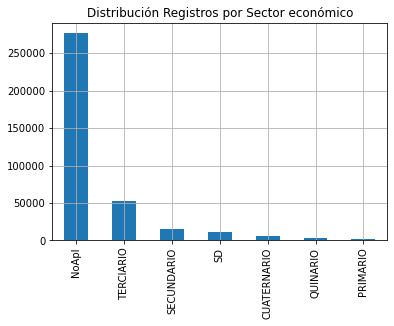

In [233]:
df_user['USU_SECTOR_ECONOMICO'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Sector económico')    
plt.grid()
plt.show()

-------------------------------------------------

**11. USU_DEPARTAMENTO**

A continuación realizaremos la transformación sobre el departamento extraeremos la información que nos puede aportar utilizando un catálogo.

**En primer lugar cargamos el catálogo de los departamentos**

In [234]:
df_catalog = pd.read_excel('Data/Departamentos_Colombia.xlsx')

In [235]:
df_catalog.head(5)

,Departamento,Municipios,Capital,Superficie_Km2,Poblacion,Densidad_Poblacion,IDH
0,Amazonas,2,Leticia,109665,74541,0.68,0.768
1,Antioquia,125,Medellín,63612,6456207,101.49,0.849
2,Arauca,7,Arauca,23818,262315,11.01,0.804
3,Atlántico,23,Barranquilla,3019,2461001,815.17,0.835
4,Bogotá,1,Bogotá,1775,7878783,4438.75,0.904


**Cambiaremos los valores de forma que eliminemos las tildes y ponemos en mayusculas**

In [236]:
def quitar_signo(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
        
    return s

In [237]:
df_catalog['Departamento'] = df_catalog['Departamento'].apply(lambda x: quitar_signo(x)).str.upper()
df_user['USU_DEPARTAMENTO'] = df_user['USU_DEPARTAMENTO'].apply(lambda x: quitar_signo(x)).str.upper()

In [238]:
df_catalog.head(5)

,Departamento,Municipios,Capital,Superficie_Km2,Poblacion,Densidad_Poblacion,IDH
0,AMAZONAS,2,Leticia,109665,74541,0.68,0.768
1,ANTIOQUIA,125,Medellín,63612,6456207,101.49,0.849
2,ARAUCA,7,Arauca,23818,262315,11.01,0.804
3,ATLANTICO,23,Barranquilla,3019,2461001,815.17,0.835
4,BOGOTA,1,Bogotá,1775,7878783,4438.75,0.904


**Agregamos la información**

In [239]:
df_catalog = df_catalog[['Departamento','Densidad_Poblacion','IDH']]

In [240]:
df_user = pd.merge(left = df_user, right = df_catalog, how = 'left', left_on = 'USU_DEPARTAMENTO', right_on = 'Departamento')

In [241]:
df_user.head(3)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,IPCASOS,IP_Country,IP_Region,USU_TIPO,USU_TAMANIO,USU_ESTADO,USU_DEPARTAMENTO,PIB_GRUPO,IDH_NUMBER,IDH_GROUP,TIPO_TELF,SECCION_DESC,USU_SECTOR_ECONOMICO,Departamento,Densidad_Poblacion,IDH
0,8107310,PF,2019-10-22,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,0,1,COLOMBIA,Valle del Cauca,NoApl,NoApl,NoApl,NOAPL,Ingreso mediano alto,0.767,Alto,NO_PUBLICO,NoApl,NoApl,NaN,NaN,NaN
1,7784565,PJ,2019-05-14,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Antioquia,SOC_COMERCIAL_INDUSTRIAL,PQ,ACTIVA,QUINDIO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,TERCIARIO,QUINDIO,306.38,0.832
2,7718778,PJ,2019-09-04,7,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Bolivar,SOC_COMERCIAL_INDUSTRIAL,MC,ACTIVA,ATLANTICO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,TERCIARIO,ATLANTICO,815.17,0.835


In [242]:
df_user.loc[df_user['USU_DEPARTAMENTO'].isin(['NOAPL']), ['Densidad_Poblacion','IDH']] = 'NOAPL'
df_user.loc[df_user['USU_DEPARTAMENTO'].isin(['SD']), ['Densidad_Poblacion','IDH']] = 'SD'

In [243]:
df_user.drop(['Departamento'], axis = 1, inplace = True)

Comprobacion

In [244]:
df_user.isna().sum()

ID_USUARIO              0
TIPOUSUARIO             0
FECHA_REGISTRO          0
CANAL_REGISTRO          0
IND_CLIENTE             0
IND_ALTA                0
FECHA_ALTA              0
FECHA_CLIENTE           0
TIPOEMAIL               0
BONDAD_EMAIL            0
IPCASOS                 0
IP_Country              0
IP_Region               0
USU_TIPO                0
USU_TAMANIO             0
USU_ESTADO              0
USU_DEPARTAMENTO        0
PIB_GRUPO               0
IDH_NUMBER              0
IDH_GROUP               0
TIPO_TELF               0
SECCION_DESC            0
USU_SECTOR_ECONOMICO    0
Densidad_Poblacion      0
IDH                     0
dtype: int64

-------------------------------------------------

-------------------------------------------------

### Renombramos y ordenamos columnas

In [245]:
df_user.rename(columns = {'IP_Country': 'IP_COUNTRY', 
                          'IP_Region': 'IP_REGION',
                          'Densidad_Poblacion': 'USU_DEPART_DEN_POB',
                          'IDH': 'USU_DEPART_IDH',
                          'PIB_GRUPO': 'IP_COUNTRY_PIB',
                          'IDH_NUMBER': 'IP_COUNTRY_IDH_NUM',
                          'IDH_GROUP': 'IP_COUNTRY_IDH_GROUP',
                          'SECCION_DESC': 'USU_SECCION_DESC'}, inplace = True)

In [246]:
df_user.head(3)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,IND_ALTA,FECHA_ALTA,FECHA_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,IPCASOS,IP_COUNTRY,IP_REGION,USU_TIPO,USU_TAMANIO,USU_ESTADO,USU_DEPARTAMENTO,IP_COUNTRY_PIB,IP_COUNTRY_IDH_NUM,IP_COUNTRY_IDH_GROUP,TIPO_TELF,USU_SECCION_DESC,USU_SECTOR_ECONOMICO,USU_DEPART_DEN_POB,USU_DEPART_IDH
0,8107310,PF,2019-10-22,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,0,1,COLOMBIA,Valle del Cauca,NoApl,NoApl,NoApl,NOAPL,Ingreso mediano alto,0.767,Alto,NO_PUBLICO,NoApl,NoApl,NOAPL,NOAPL
1,7784565,PJ,2019-05-14,3,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Antioquia,SOC_COMERCIAL_INDUSTRIAL,PQ,ACTIVA,QUINDIO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,TERCIARIO,306.38,0.832
2,7718778,PJ,2019-09-04,7,0,0,NoApl,NoApl,GOOHOTYAHMAIL,1,1,COLOMBIA,Bolivar,SOC_COMERCIAL_INDUSTRIAL,MC,ACTIVA,ATLANTICO,Ingreso mediano alto,0.767,Alto,NO_PUBLICO,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,TERCIARIO,815.17,0.835


**Ordenamos columnas**

In [247]:
df_user.columns

Index(['ID_USUARIO', 'TIPOUSUARIO', 'FECHA_REGISTRO', 'CANAL_REGISTRO',
       'IND_CLIENTE', 'IND_ALTA', 'FECHA_ALTA', 'FECHA_CLIENTE', 'TIPOEMAIL',
       'BONDAD_EMAIL', 'IPCASOS', 'IP_COUNTRY', 'IP_REGION', 'USU_TIPO',
       'USU_TAMANIO', 'USU_ESTADO', 'USU_DEPARTAMENTO', 'IP_COUNTRY_PIB',
       'IP_COUNTRY_IDH_NUM', 'IP_COUNTRY_IDH_GROUP', 'TIPO_TELF',
       'USU_SECCION_DESC', 'USU_SECTOR_ECONOMICO', 'USU_DEPART_DEN_POB',
       'USU_DEPART_IDH'],
      dtype='object')

In [248]:
df_user = df_user[['ID_USUARIO','TIPOUSUARIO','FECHA_REGISTRO','CANAL_REGISTRO','FECHA_ALTA','IND_ALTA','FECHA_CLIENTE','IND_CLIENTE','TIPOEMAIL','BONDAD_EMAIL','TIPO_TELF','IPCASOS',
                   'IP_COUNTRY','IP_REGION','IP_COUNTRY_PIB','IP_COUNTRY_IDH_NUM','IP_COUNTRY_IDH_GROUP','USU_TIPO','USU_TAMANIO','USU_ESTADO','USU_SECCION_DESC','USU_DEPARTAMENTO',
                   'USU_DEPART_DEN_POB','USU_DEPART_IDH']]

Comprobacion

In [249]:
df_user.head(3)

,ID_USUARIO,TIPOUSUARIO,FECHA_REGISTRO,CANAL_REGISTRO,FECHA_ALTA,IND_ALTA,FECHA_CLIENTE,IND_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,TIPO_TELF,IPCASOS,IP_COUNTRY,IP_REGION,IP_COUNTRY_PIB,IP_COUNTRY_IDH_NUM,IP_COUNTRY_IDH_GROUP,USU_TIPO,USU_TAMANIO,USU_ESTADO,USU_SECCION_DESC,USU_DEPARTAMENTO,USU_DEPART_DEN_POB,USU_DEPART_IDH
0,8107310,PF,2019-10-22,3,NoApl,0,NoApl,0,GOOHOTYAHMAIL,0,NO_PUBLICO,1,COLOMBIA,Valle del Cauca,Ingreso mediano alto,0.767,Alto,NoApl,NoApl,NoApl,NoApl,NOAPL,NOAPL,NOAPL
1,7784565,PJ,2019-05-14,3,NoApl,0,NoApl,0,GOOHOTYAHMAIL,1,NO_PUBLICO,1,COLOMBIA,Antioquia,Ingreso mediano alto,0.767,Alto,SOC_COMERCIAL_INDUSTRIAL,PQ,ACTIVA,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,QUINDIO,306.38,0.832
2,7718778,PJ,2019-09-04,7,NoApl,0,NoApl,0,GOOHOTYAHMAIL,1,NO_PUBLICO,1,COLOMBIA,Bolivar,Ingreso mediano alto,0.767,Alto,SOC_COMERCIAL_INDUSTRIAL,MC,ACTIVA,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,ATLANTICO,815.17,0.835


-------------------------------------------------

-------------------------------------------------

### Análisis Final

In [250]:
profile = ProfileReport(df_user)
profile.to_file('report_user_clean.html')

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-------------------------------------------------

-------------------------------------------------

### Escritura de Datos

In [251]:
df_user.to_csv('Data/Usuarios_Clean.txt', sep = ';', encoding = 'ISO-8859-1', index = False)